## EXP_2389_seq_prune_08_2_32_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [2]:
exp_dict = OrderedDict()

#### Get MNIST data

In [3]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
Instructions for updating:
Please use `layer.add_weight` method instead.
round0 [2 3 9 8]
2
Epoch 1/5
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1250/1250 - 3s - loss: 0.1316 - accuracy: 0.9521 - val_loss: 0.0712 - val_accuracy: 0.9787
Epoch 2/5
1250/1250 - 4s - loss: 0.0468 - accuracy: 0.9863 - val_loss: 0.0574 - val_accuracy: 0.9810
Epoch 3/5
1250/1250 - 4s - loss: 0.0253 - accuracy: 0.9929 - val_loss: 0.0530 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 3s - loss: 0.0149 - accuracy: 0.9961 - val_loss: 0.0543 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 3s - loss: 0.0085 - accuracy: 0.9985 - val_loss: 0.0608 - val_accuracy: 0.9866


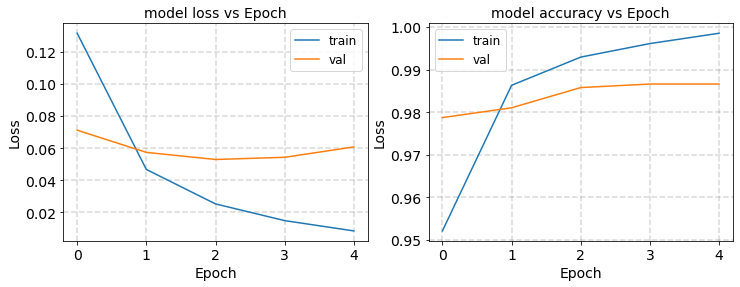

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1765 - accuracy: 0.9496 - val_loss: 0.0881 - val_accuracy: 0.9683
Epoch 2/5
1250/1250 - 3s - loss: 0.0604 - accuracy: 0.9806 - val_loss: 0.0748 - val_accuracy: 0.9746
Epoch 3/5
1250/1250 - 3s - loss: 0.0426 - accuracy: 0.9872 - val_loss: 0.0757 - val_accuracy: 0.9771
Epoch 4/5
1250/1250 - 3s - loss: 0.0311 - accuracy: 0.9905 - val_loss: 0.0727 - val_accuracy: 0.9762
Epoch 5/5
1250/1250 - 4s - loss: 0.0222 - accuracy: 0.9936 - val_loss: 0.0736 - val_accuracy: 0.9778


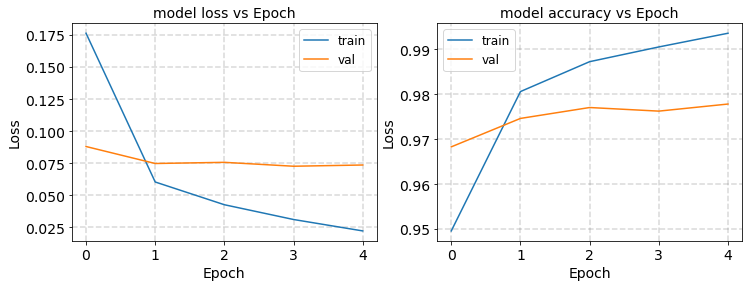

9
Epoch 1/5
1250/1250 - 6s - loss: 0.1677 - accuracy: 0.9517 - val_loss: 0.0891 - val_accuracy: 0.9731
Epoch 2/5
1250/1250 - 4s - loss: 0.0639 - accuracy: 0.9811 - val_loss: 0.0689 - val_accuracy: 0.9763
Epoch 3/5
1250/1250 - 3s - loss: 0.0490 - accuracy: 0.9853 - val_loss: 0.0586 - val_accuracy: 0.9811
Epoch 4/5
1250/1250 - 3s - loss: 0.0391 - accuracy: 0.9877 - val_loss: 0.0524 - val_accuracy: 0.9827
Epoch 5/5
1250/1250 - 3s - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.0527 - val_accuracy: 0.9835


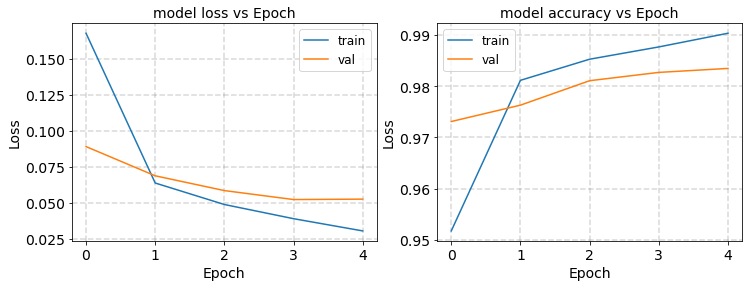

8
Epoch 1/5
1250/1250 - 2s - loss: 0.2742 - accuracy: 0.9016 - val_loss: 0.0844 - val_accuracy: 0.9716
Epoch 2/5
1250/1250 - 2s - loss: 0.0686 - accuracy: 0.9774 - val_loss: 0.0672 - val_accuracy: 0.9795
Epoch 3/5
1250/1250 - 3s - loss: 0.0498 - accuracy: 0.9839 - val_loss: 0.0666 - val_accuracy: 0.9787
Epoch 4/5
1250/1250 - 3s - loss: 0.0406 - accuracy: 0.9874 - val_loss: 0.0666 - val_accuracy: 0.9795
Epoch 5/5
1250/1250 - 3s - loss: 0.0340 - accuracy: 0.9899 - val_loss: 0.0650 - val_accuracy: 0.9811


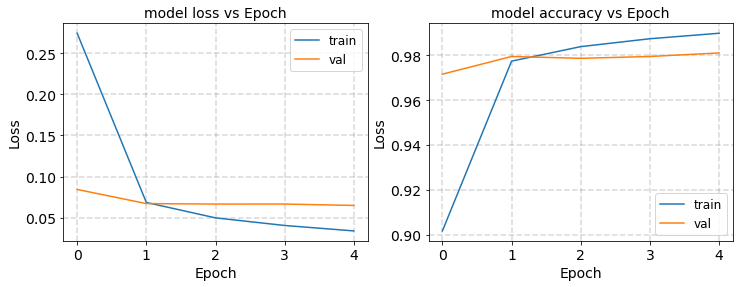

round1 [2 9 8 3]
2
Epoch 1/5
1250/1250 - 3s - loss: 0.2069 - accuracy: 0.9431 - val_loss: 0.0699 - val_accuracy: 0.9763
Epoch 2/5
1250/1250 - 2s - loss: 0.0541 - accuracy: 0.9809 - val_loss: 0.0630 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 2s - loss: 0.0386 - accuracy: 0.9876 - val_loss: 0.0594 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 2s - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0587 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 2s - loss: 0.0222 - accuracy: 0.9932 - val_loss: 0.0703 - val_accuracy: 0.9882


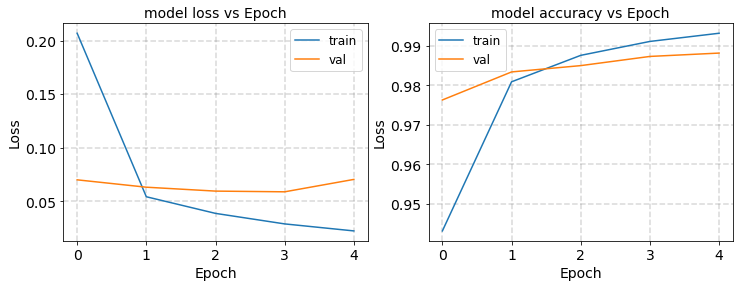

9
Epoch 1/5
1250/1250 - 2s - loss: 0.2398 - accuracy: 0.9314 - val_loss: 0.0786 - val_accuracy: 0.9707
Epoch 2/5
1250/1250 - 3s - loss: 0.0489 - accuracy: 0.9839 - val_loss: 0.0642 - val_accuracy: 0.9747
Epoch 3/5
1250/1250 - 2s - loss: 0.0324 - accuracy: 0.9893 - val_loss: 0.0643 - val_accuracy: 0.9771
Epoch 4/5
1250/1250 - 2s - loss: 0.0251 - accuracy: 0.9918 - val_loss: 0.0681 - val_accuracy: 0.9803
Epoch 5/5
1250/1250 - 2s - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0692 - val_accuracy: 0.9779


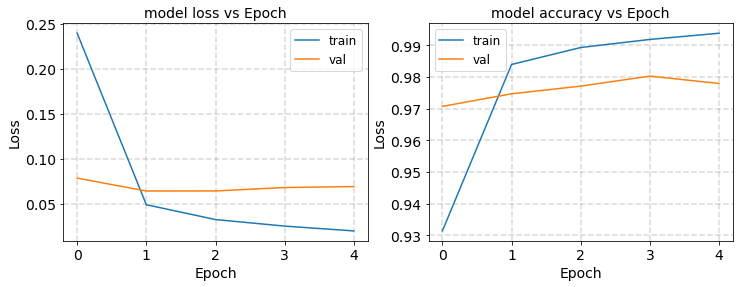

8
Epoch 1/5
1250/1250 - 2s - loss: 0.2637 - accuracy: 0.9144 - val_loss: 0.1260 - val_accuracy: 0.9628
Epoch 2/5
1250/1250 - 3s - loss: 0.0878 - accuracy: 0.9761 - val_loss: 0.0988 - val_accuracy: 0.9660
Epoch 3/5
1250/1250 - 2s - loss: 0.0609 - accuracy: 0.9824 - val_loss: 0.0894 - val_accuracy: 0.9715
Epoch 4/5
1250/1250 - 2s - loss: 0.0477 - accuracy: 0.9860 - val_loss: 0.0886 - val_accuracy: 0.9739
Epoch 5/5
1250/1250 - 3s - loss: 0.0395 - accuracy: 0.9889 - val_loss: 0.0893 - val_accuracy: 0.9747


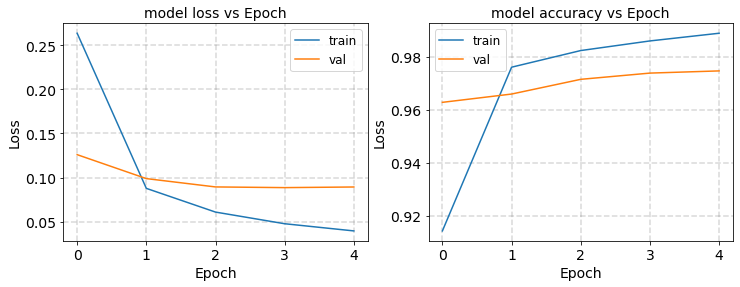

3
Epoch 1/5
1250/1250 - 3s - loss: 0.4815 - accuracy: 0.8476 - val_loss: 0.1963 - val_accuracy: 0.9399
Epoch 2/5
1250/1250 - 2s - loss: 0.1480 - accuracy: 0.9521 - val_loss: 0.1573 - val_accuracy: 0.9526
Epoch 3/5
1250/1250 - 2s - loss: 0.1110 - accuracy: 0.9653 - val_loss: 0.1430 - val_accuracy: 0.9582
Epoch 4/5
1250/1250 - 2s - loss: 0.0926 - accuracy: 0.9707 - val_loss: 0.1352 - val_accuracy: 0.9573
Epoch 5/5
1250/1250 - 2s - loss: 0.0795 - accuracy: 0.9746 - val_loss: 0.1324 - val_accuracy: 0.9589


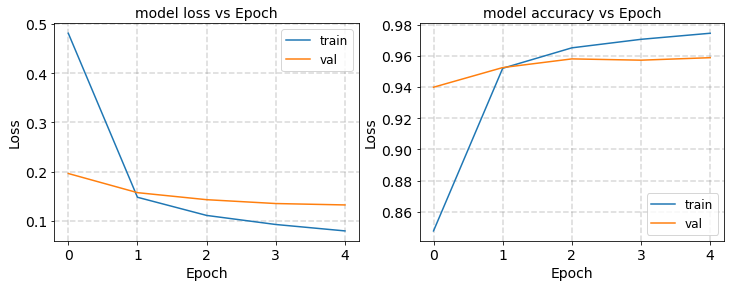

round2 [9 8 3 2]
9
Epoch 1/5
1250/1250 - 2s - loss: 0.1836 - accuracy: 0.9424 - val_loss: 0.1037 - val_accuracy: 0.9693
Epoch 2/5
1250/1250 - 2s - loss: 0.0566 - accuracy: 0.9834 - val_loss: 0.0947 - val_accuracy: 0.9716
Epoch 3/5
1250/1250 - 3s - loss: 0.0439 - accuracy: 0.9886 - val_loss: 0.0933 - val_accuracy: 0.9756
Epoch 4/5
1250/1250 - 3s - loss: 0.0365 - accuracy: 0.9908 - val_loss: 0.0938 - val_accuracy: 0.9779
Epoch 5/5
1250/1250 - 3s - loss: 0.0302 - accuracy: 0.9919 - val_loss: 0.0926 - val_accuracy: 0.9724


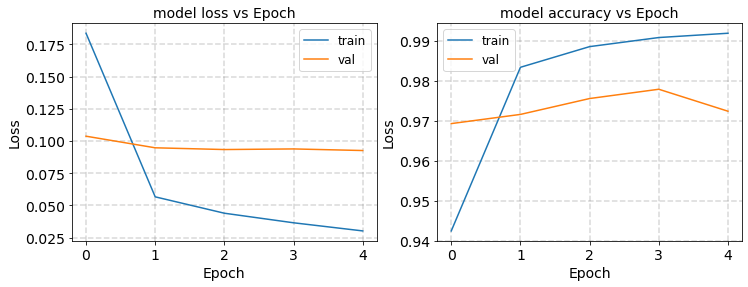

8
Epoch 1/5
1250/1250 - 4s - loss: 0.4856 - accuracy: 0.8512 - val_loss: 0.1338 - val_accuracy: 0.9605
Epoch 2/5
1250/1250 - 3s - loss: 0.0791 - accuracy: 0.9739 - val_loss: 0.0932 - val_accuracy: 0.9716
Epoch 3/5
1250/1250 - 3s - loss: 0.0569 - accuracy: 0.9816 - val_loss: 0.0858 - val_accuracy: 0.9716
Epoch 4/5
1250/1250 - 3s - loss: 0.0479 - accuracy: 0.9847 - val_loss: 0.0864 - val_accuracy: 0.9716
Epoch 5/5
1250/1250 - 3s - loss: 0.0422 - accuracy: 0.9870 - val_loss: 0.0856 - val_accuracy: 0.9700


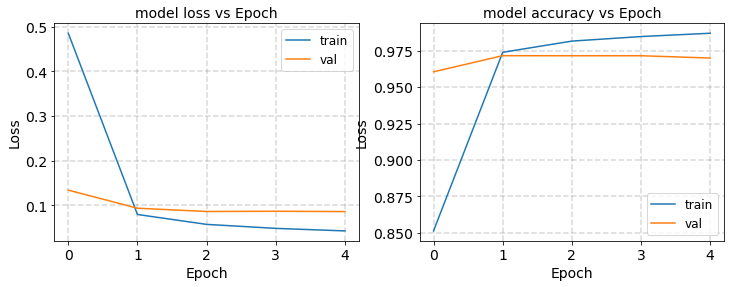

3
Epoch 1/5
1250/1250 - 4s - loss: 0.2668 - accuracy: 0.9202 - val_loss: 0.1437 - val_accuracy: 0.9582
Epoch 2/5
1250/1250 - 3s - loss: 0.0845 - accuracy: 0.9721 - val_loss: 0.1351 - val_accuracy: 0.9613
Epoch 3/5
1250/1250 - 4s - loss: 0.0698 - accuracy: 0.9774 - val_loss: 0.1319 - val_accuracy: 0.9621
Epoch 4/5
1250/1250 - 3s - loss: 0.0610 - accuracy: 0.9808 - val_loss: 0.1295 - val_accuracy: 0.9668
Epoch 5/5
1250/1250 - 4s - loss: 0.0543 - accuracy: 0.9832 - val_loss: 0.1332 - val_accuracy: 0.9644


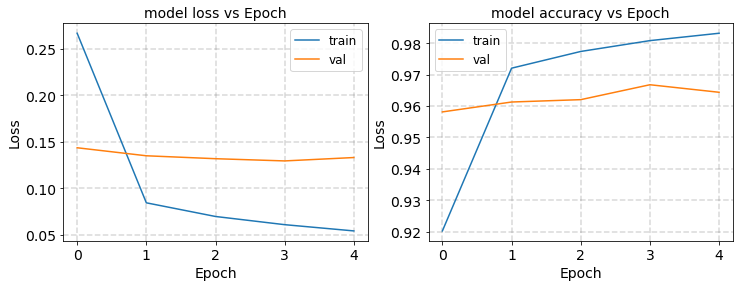

2
Epoch 1/5
1250/1250 - 4s - loss: 0.2391 - accuracy: 0.9317 - val_loss: 0.0878 - val_accuracy: 0.9708
Epoch 2/5
1250/1250 - 4s - loss: 0.0601 - accuracy: 0.9823 - val_loss: 0.0682 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 3s - loss: 0.0437 - accuracy: 0.9866 - val_loss: 0.0684 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 0.0345 - accuracy: 0.9902 - val_loss: 0.0721 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 3s - loss: 0.0288 - accuracy: 0.9926 - val_loss: 0.0678 - val_accuracy: 0.9858


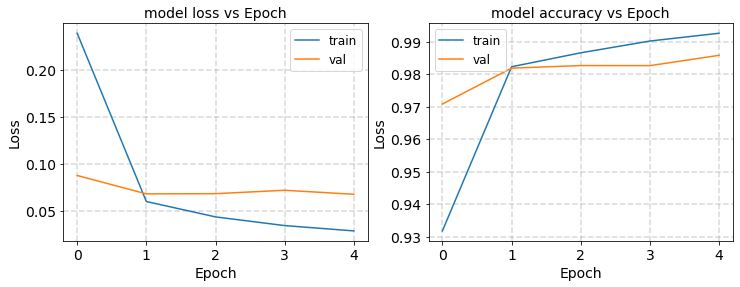

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten  (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense (P (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_1  (None, 32)                2082      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 2s - loss: 1.0082 - accuracy: 0.6323 - val_loss: 0.6113 - val_accuracy: 0.8276
Epoch 2/10
1250/1250 - 3s - loss: 0.5213 - accuracy: 0.8519 - val_loss: 0.4694 - val_accuracy: 0.8747
Epoch 3/10
1250/1250 - 2s - loss: 0.418

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 1
round0 [8 2 9 3]
8
Epoch 1/5
1250/1250 - 4s - loss: 0.1980 - accuracy: 0.9288 - val_loss: 0.1177 - val_accuracy: 0.9653
Epoch 2/5
1250/1250 - 4s - loss: 0.0976 - accuracy: 0.9671 - val_loss: 0.1006 - val_accuracy: 0.9700
Epoch 3/5
1250/1250 - 3s - loss: 0.0723 - accuracy: 0.9760 - val_loss: 0.0970 - val_accuracy: 0.9708
Epoch 4/5
1250/1250 - 2s - loss: 0.0551 - accuracy: 0.9817 - val_loss: 0.0836 - val_accuracy: 0.9756
Epoch 5/5
1250/1250 - 3s - loss: 0.0426 - accuracy: 0.9868 - val_loss: 0.0862 - val_accuracy: 0.9740


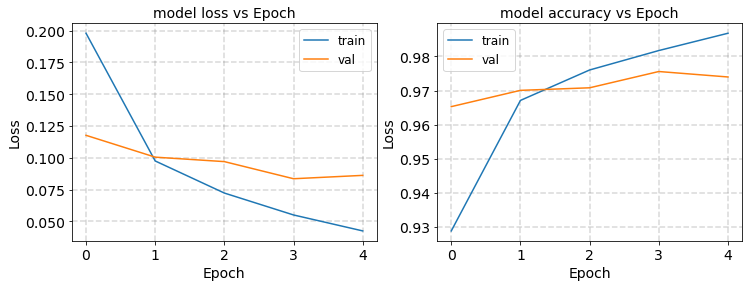

2
Epoch 1/5
1250/1250 - 3s - loss: 0.2133 - accuracy: 0.9256 - val_loss: 0.0980 - val_accuracy: 0.9692
Epoch 2/5
1250/1250 - 2s - loss: 0.0777 - accuracy: 0.9744 - val_loss: 0.0682 - val_accuracy: 0.9779
Epoch 3/5
1250/1250 - 3s - loss: 0.0538 - accuracy: 0.9833 - val_loss: 0.0609 - val_accuracy: 0.9795
Epoch 4/5
1250/1250 - 3s - loss: 0.0403 - accuracy: 0.9880 - val_loss: 0.0556 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 2s - loss: 0.0294 - accuracy: 0.9922 - val_loss: 0.0595 - val_accuracy: 0.9779


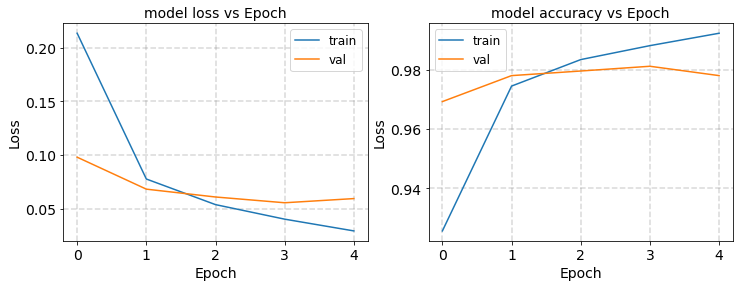

9
Epoch 1/5
1250/1250 - 3s - loss: 0.2275 - accuracy: 0.9321 - val_loss: 0.1279 - val_accuracy: 0.9684
Epoch 2/5
1250/1250 - 2s - loss: 0.0893 - accuracy: 0.9814 - val_loss: 0.0993 - val_accuracy: 0.9731
Epoch 3/5
1250/1250 - 3s - loss: 0.0661 - accuracy: 0.9839 - val_loss: 0.0867 - val_accuracy: 0.9755
Epoch 4/5
1250/1250 - 2s - loss: 0.0529 - accuracy: 0.9868 - val_loss: 0.0801 - val_accuracy: 0.9779
Epoch 5/5
1250/1250 - 3s - loss: 0.0438 - accuracy: 0.9883 - val_loss: 0.0755 - val_accuracy: 0.9731


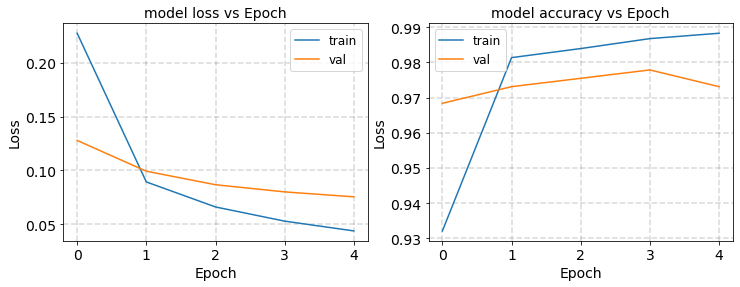

3
Epoch 1/5
1250/1250 - 3s - loss: 0.3260 - accuracy: 0.8847 - val_loss: 0.1540 - val_accuracy: 0.9487
Epoch 2/5
1250/1250 - 2s - loss: 0.1283 - accuracy: 0.9556 - val_loss: 0.1295 - val_accuracy: 0.9645
Epoch 3/5
1250/1250 - 3s - loss: 0.1050 - accuracy: 0.9684 - val_loss: 0.1183 - val_accuracy: 0.9683
Epoch 4/5
1250/1250 - 2s - loss: 0.0910 - accuracy: 0.9733 - val_loss: 0.1092 - val_accuracy: 0.9723
Epoch 5/5
1250/1250 - 3s - loss: 0.0808 - accuracy: 0.9770 - val_loss: 0.1048 - val_accuracy: 0.9731


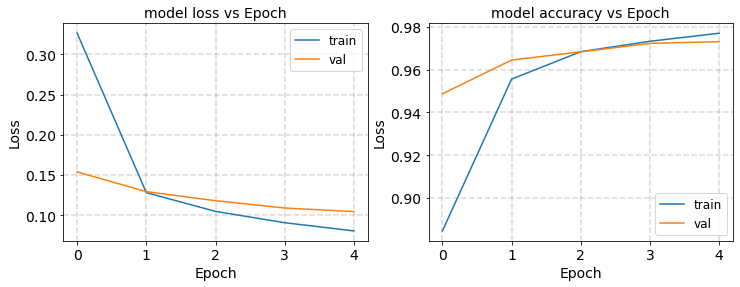

round1 [9 2 3 8]
9
Epoch 1/5
1250/1250 - 2s - loss: 0.1513 - accuracy: 0.9519 - val_loss: 0.0970 - val_accuracy: 0.9676
Epoch 2/5
1250/1250 - 3s - loss: 0.0531 - accuracy: 0.9836 - val_loss: 0.0842 - val_accuracy: 0.9716
Epoch 3/5
1250/1250 - 2s - loss: 0.0400 - accuracy: 0.9882 - val_loss: 0.0788 - val_accuracy: 0.9763
Epoch 4/5
1250/1250 - 3s - loss: 0.0318 - accuracy: 0.9910 - val_loss: 0.0744 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 2s - loss: 0.0253 - accuracy: 0.9929 - val_loss: 0.0743 - val_accuracy: 0.9779


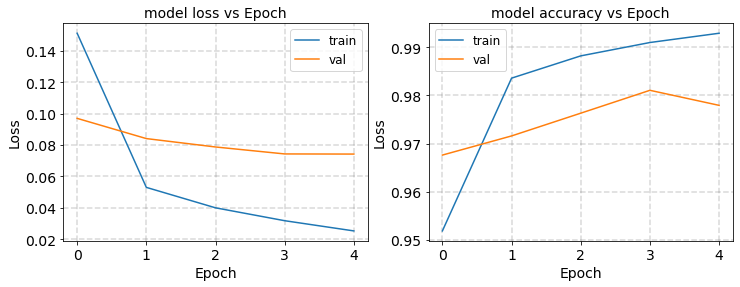

2
Epoch 1/5
1250/1250 - 3s - loss: 0.3254 - accuracy: 0.9112 - val_loss: 0.1105 - val_accuracy: 0.9645
Epoch 2/5
1250/1250 - 3s - loss: 0.0902 - accuracy: 0.9708 - val_loss: 0.0895 - val_accuracy: 0.9732
Epoch 3/5
1250/1250 - 3s - loss: 0.0684 - accuracy: 0.9773 - val_loss: 0.0846 - val_accuracy: 0.9763
Epoch 4/5
1250/1250 - 3s - loss: 0.0555 - accuracy: 0.9820 - val_loss: 0.0779 - val_accuracy: 0.9787
Epoch 5/5
1250/1250 - 3s - loss: 0.0462 - accuracy: 0.9865 - val_loss: 0.0757 - val_accuracy: 0.9779


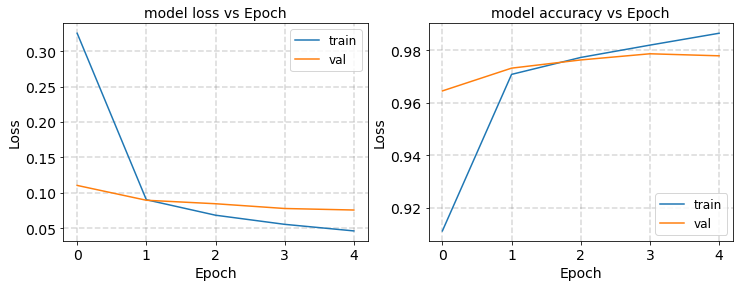

3
Epoch 1/5
1250/1250 - 2s - loss: 0.3315 - accuracy: 0.8918 - val_loss: 0.1406 - val_accuracy: 0.9574
Epoch 2/5
1250/1250 - 2s - loss: 0.1100 - accuracy: 0.9642 - val_loss: 0.1187 - val_accuracy: 0.9683
Epoch 3/5
1250/1250 - 3s - loss: 0.0936 - accuracy: 0.9695 - val_loss: 0.1147 - val_accuracy: 0.9667
Epoch 4/5
1250/1250 - 3s - loss: 0.0831 - accuracy: 0.9734 - val_loss: 0.1128 - val_accuracy: 0.9627
Epoch 5/5
1250/1250 - 3s - loss: 0.0745 - accuracy: 0.9766 - val_loss: 0.1115 - val_accuracy: 0.9706


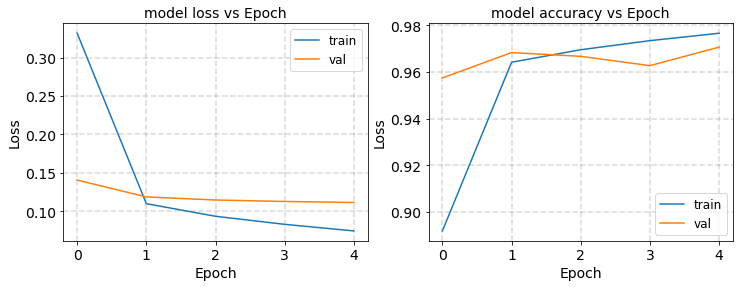

8
Epoch 1/5
1250/1250 - 3s - loss: 0.4226 - accuracy: 0.8344 - val_loss: 0.2365 - val_accuracy: 0.9039
Epoch 2/5
1250/1250 - 3s - loss: 0.1779 - accuracy: 0.9352 - val_loss: 0.1479 - val_accuracy: 0.9456
Epoch 3/5
1250/1250 - 3s - loss: 0.1221 - accuracy: 0.9562 - val_loss: 0.1200 - val_accuracy: 0.9551
Epoch 4/5
1250/1250 - 2s - loss: 0.0996 - accuracy: 0.9640 - val_loss: 0.1103 - val_accuracy: 0.9622
Epoch 5/5
1250/1250 - 3s - loss: 0.0880 - accuracy: 0.9687 - val_loss: 0.1094 - val_accuracy: 0.9598


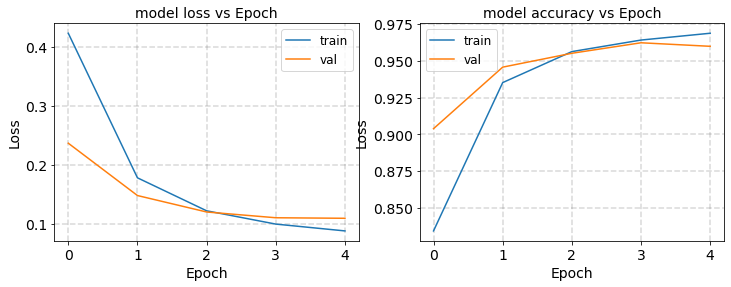

round2 [9 2 3 8]
9
Epoch 1/5
1250/1250 - 3s - loss: 0.1421 - accuracy: 0.9560 - val_loss: 0.1179 - val_accuracy: 0.9684
Epoch 2/5
1250/1250 - 3s - loss: 0.0541 - accuracy: 0.9839 - val_loss: 0.1150 - val_accuracy: 0.9707
Epoch 3/5
1250/1250 - 3s - loss: 0.0455 - accuracy: 0.9865 - val_loss: 0.1173 - val_accuracy: 0.9715
Epoch 4/5
1250/1250 - 4s - loss: 0.0403 - accuracy: 0.9885 - val_loss: 0.1210 - val_accuracy: 0.9715
Epoch 5/5
1250/1250 - 4s - loss: 0.0365 - accuracy: 0.9896 - val_loss: 0.1264 - val_accuracy: 0.9715


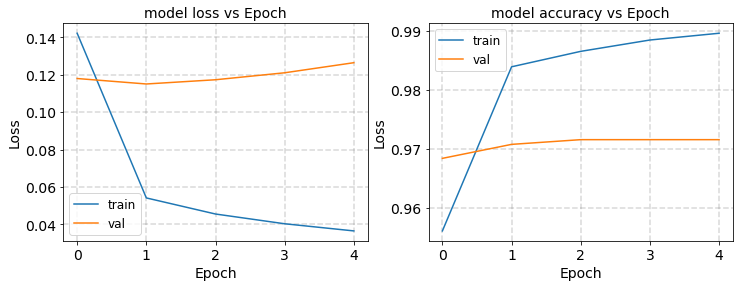

2
Epoch 1/5
1250/1250 - 3s - loss: 0.5388 - accuracy: 0.8476 - val_loss: 0.1598 - val_accuracy: 0.9518
Epoch 2/5
1250/1250 - 3s - loss: 0.1218 - accuracy: 0.9562 - val_loss: 0.1292 - val_accuracy: 0.9590
Epoch 3/5
1250/1250 - 2s - loss: 0.0956 - accuracy: 0.9668 - val_loss: 0.1185 - val_accuracy: 0.9668
Epoch 4/5
1250/1250 - 3s - loss: 0.0809 - accuracy: 0.9733 - val_loss: 0.1070 - val_accuracy: 0.9692
Epoch 5/5
1250/1250 - 2s - loss: 0.0715 - accuracy: 0.9776 - val_loss: 0.1039 - val_accuracy: 0.9708


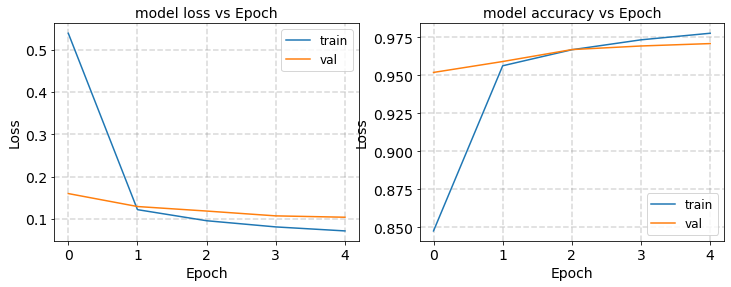

3
Epoch 1/5
1250/1250 - 3s - loss: 0.3321 - accuracy: 0.8871 - val_loss: 0.1671 - val_accuracy: 0.9495
Epoch 2/5
1250/1250 - 3s - loss: 0.1367 - accuracy: 0.9541 - val_loss: 0.1474 - val_accuracy: 0.9596
Epoch 3/5
1250/1250 - 2s - loss: 0.1190 - accuracy: 0.9611 - val_loss: 0.1391 - val_accuracy: 0.9621
Epoch 4/5
1250/1250 - 2s - loss: 0.1081 - accuracy: 0.9658 - val_loss: 0.1316 - val_accuracy: 0.9589
Epoch 5/5
1250/1250 - 3s - loss: 0.0994 - accuracy: 0.9694 - val_loss: 0.1265 - val_accuracy: 0.9628


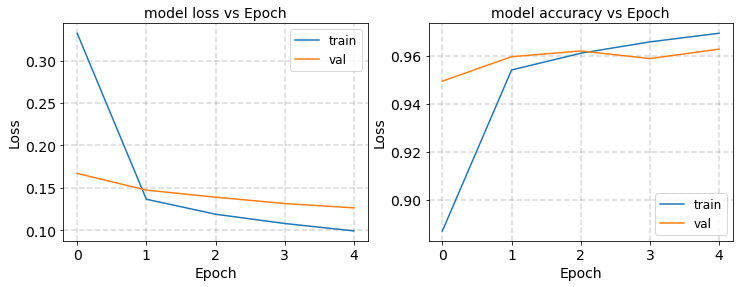

8
Epoch 1/5
1250/1250 - 2s - loss: 0.3427 - accuracy: 0.8806 - val_loss: 0.1736 - val_accuracy: 0.9402
Epoch 2/5
1250/1250 - 3s - loss: 0.1314 - accuracy: 0.9514 - val_loss: 0.1400 - val_accuracy: 0.9550
Epoch 3/5
1250/1250 - 3s - loss: 0.1073 - accuracy: 0.9622 - val_loss: 0.1247 - val_accuracy: 0.9582
Epoch 4/5
1250/1250 - 3s - loss: 0.0938 - accuracy: 0.9671 - val_loss: 0.1172 - val_accuracy: 0.9638
Epoch 5/5
1250/1250 - 3s - loss: 0.0810 - accuracy: 0.9722 - val_loss: 0.1116 - val_accuracy: 0.9645


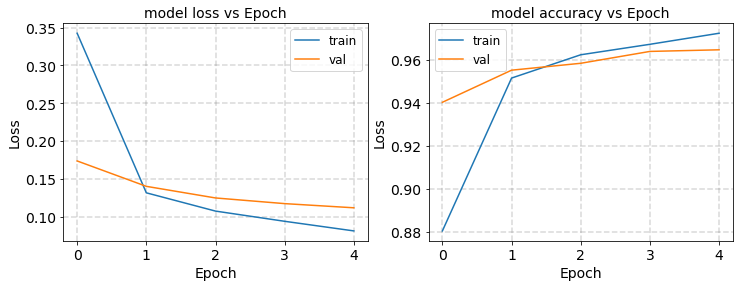

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_4  (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_5  (None, 32)                2082      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 2s - loss: 0.6526 - accuracy: 0.8152 - val_loss: 0.3329 - val_accuracy: 0.9139
Epoch 2/10
1250/1250 - 2s - loss: 0.2738 - accuracy: 0.9265 - val_loss: 0.2693 - val_accuracy: 0.9233
Epoch 3/10
1250/1250 - 1s - loss: 0.232

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 2
round0 [9 8 3 2]
9
Epoch 1/5
1250/1250 - 5s - loss: 0.1396 - accuracy: 0.9517 - val_loss: 0.0875 - val_accuracy: 0.9771
Epoch 2/5
1250/1250 - 3s - loss: 0.0426 - accuracy: 0.9866 - val_loss: 0.0717 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 4s - loss: 0.0266 - accuracy: 0.9915 - val_loss: 0.0707 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 4s - loss: 0.0169 - accuracy: 0.9950 - val_loss: 0.0740 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 3s - loss: 0.0111 - accuracy: 0.9970 - val_loss: 0.0750 - val_accuracy: 0.9850


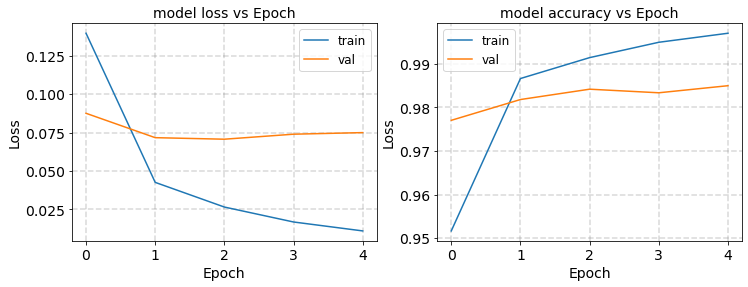

8
Epoch 1/5
1250/1250 - 4s - loss: 0.2760 - accuracy: 0.9176 - val_loss: 0.1522 - val_accuracy: 0.9486
Epoch 2/5
1250/1250 - 4s - loss: 0.1344 - accuracy: 0.9531 - val_loss: 0.1338 - val_accuracy: 0.9605
Epoch 3/5
1250/1250 - 3s - loss: 0.1129 - accuracy: 0.9611 - val_loss: 0.1224 - val_accuracy: 0.9621
Epoch 4/5
1250/1250 - 4s - loss: 0.0992 - accuracy: 0.9665 - val_loss: 0.1194 - val_accuracy: 0.9645
Epoch 5/5
1250/1250 - 4s - loss: 0.0882 - accuracy: 0.9709 - val_loss: 0.1174 - val_accuracy: 0.9685


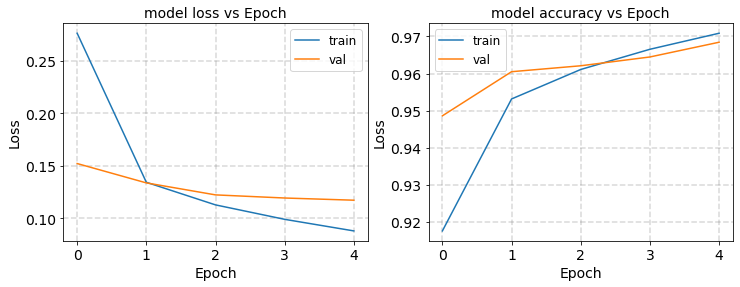

3
Epoch 1/5
1250/1250 - 3s - loss: 0.3955 - accuracy: 0.8309 - val_loss: 0.2366 - val_accuracy: 0.9375
Epoch 2/5
1250/1250 - 3s - loss: 0.2044 - accuracy: 0.9396 - val_loss: 0.1855 - val_accuracy: 0.9541
Epoch 3/5
1250/1250 - 4s - loss: 0.1661 - accuracy: 0.9494 - val_loss: 0.1715 - val_accuracy: 0.9564
Epoch 4/5
1250/1250 - 3s - loss: 0.1462 - accuracy: 0.9547 - val_loss: 0.1655 - val_accuracy: 0.9580
Epoch 5/5
1250/1250 - 3s - loss: 0.1347 - accuracy: 0.9564 - val_loss: 0.1624 - val_accuracy: 0.9564


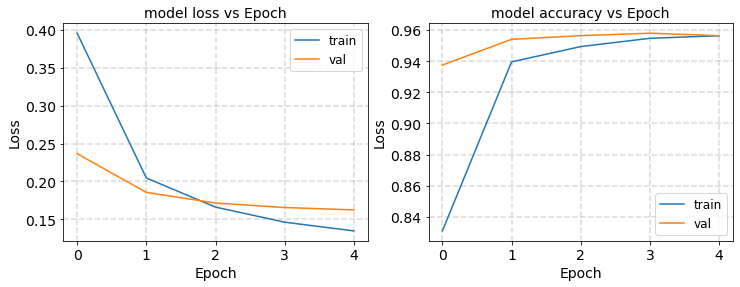

2
Epoch 1/5
1250/1250 - 5s - loss: 0.4046 - accuracy: 0.8345 - val_loss: 0.0974 - val_accuracy: 0.9700
Epoch 2/5
1250/1250 - 4s - loss: 0.0902 - accuracy: 0.9695 - val_loss: 0.0802 - val_accuracy: 0.9771
Epoch 3/5
1250/1250 - 4s - loss: 0.0704 - accuracy: 0.9765 - val_loss: 0.0767 - val_accuracy: 0.9778
Epoch 4/5
1250/1250 - 4s - loss: 0.0586 - accuracy: 0.9809 - val_loss: 0.0744 - val_accuracy: 0.9770
Epoch 5/5
1250/1250 - 3s - loss: 0.0504 - accuracy: 0.9830 - val_loss: 0.0748 - val_accuracy: 0.9754


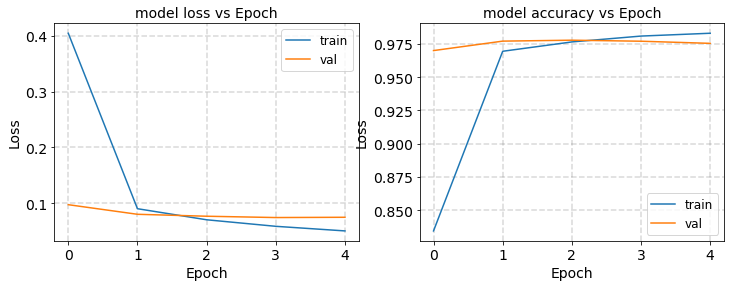

round1 [8 3 9 2]
8
Epoch 1/5
1250/1250 - 4s - loss: 0.3429 - accuracy: 0.8913 - val_loss: 0.1584 - val_accuracy: 0.9456
Epoch 2/5
1250/1250 - 4s - loss: 0.1617 - accuracy: 0.9428 - val_loss: 0.1352 - val_accuracy: 0.9520
Epoch 3/5
1250/1250 - 4s - loss: 0.1349 - accuracy: 0.9526 - val_loss: 0.1229 - val_accuracy: 0.9551
Epoch 4/5
1250/1250 - 4s - loss: 0.1161 - accuracy: 0.9599 - val_loss: 0.1157 - val_accuracy: 0.9598
Epoch 5/5
1250/1250 - 4s - loss: 0.1026 - accuracy: 0.9647 - val_loss: 0.1165 - val_accuracy: 0.9598


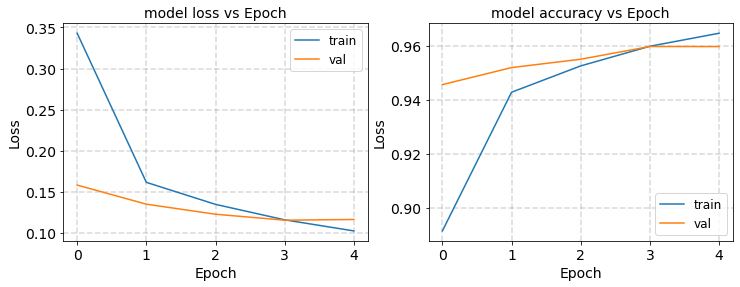

3
Epoch 1/5
1250/1250 - 4s - loss: 0.3109 - accuracy: 0.8862 - val_loss: 0.1845 - val_accuracy: 0.9510
Epoch 2/5
1250/1250 - 3s - loss: 0.1611 - accuracy: 0.9463 - val_loss: 0.1606 - val_accuracy: 0.9532
Epoch 3/5
1250/1250 - 4s - loss: 0.1391 - accuracy: 0.9553 - val_loss: 0.1586 - val_accuracy: 0.9541
Epoch 4/5
1250/1250 - 4s - loss: 0.1297 - accuracy: 0.9585 - val_loss: 0.1592 - val_accuracy: 0.9548
Epoch 5/5
1250/1250 - 3s - loss: 0.1242 - accuracy: 0.9601 - val_loss: 0.1607 - val_accuracy: 0.9548


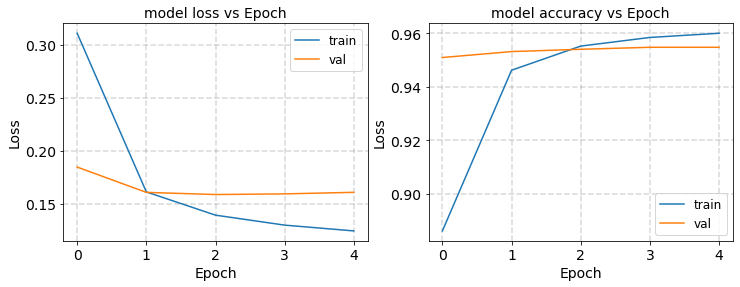

9
Epoch 1/5
1250/1250 - 4s - loss: 0.3501 - accuracy: 0.8744 - val_loss: 0.1396 - val_accuracy: 0.9471
Epoch 2/5
1250/1250 - 4s - loss: 0.1271 - accuracy: 0.9567 - val_loss: 0.1164 - val_accuracy: 0.9597
Epoch 3/5
1250/1250 - 4s - loss: 0.1097 - accuracy: 0.9637 - val_loss: 0.1096 - val_accuracy: 0.9636
Epoch 4/5
1250/1250 - 4s - loss: 0.1004 - accuracy: 0.9671 - val_loss: 0.1063 - val_accuracy: 0.9620
Epoch 5/5
1250/1250 - 4s - loss: 0.0946 - accuracy: 0.9694 - val_loss: 0.1051 - val_accuracy: 0.9613


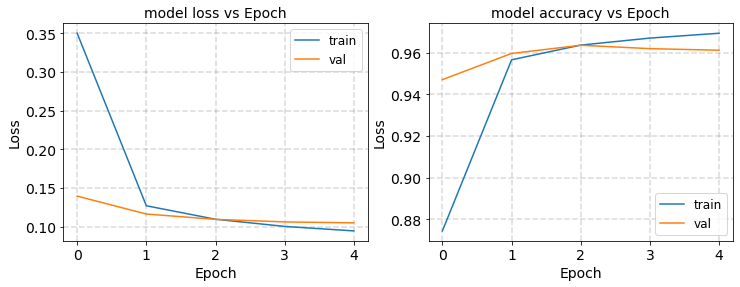

2
Epoch 1/5
1250/1250 - 4s - loss: 0.6413 - accuracy: 0.7647 - val_loss: 0.2349 - val_accuracy: 0.9128
Epoch 2/5
1250/1250 - 4s - loss: 0.1505 - accuracy: 0.9438 - val_loss: 0.0970 - val_accuracy: 0.9684
Epoch 3/5
1250/1250 - 5s - loss: 0.0768 - accuracy: 0.9751 - val_loss: 0.0880 - val_accuracy: 0.9707
Epoch 4/5
1250/1250 - 4s - loss: 0.0577 - accuracy: 0.9815 - val_loss: 0.0825 - val_accuracy: 0.9778
Epoch 5/5
1250/1250 - 4s - loss: 0.0476 - accuracy: 0.9847 - val_loss: 0.0816 - val_accuracy: 0.9771


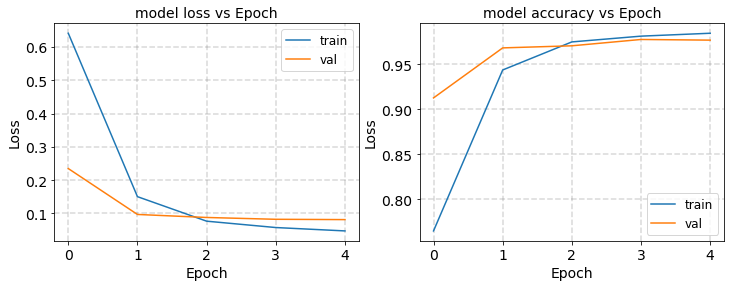

round2 [3 9 8 2]
3
Epoch 1/5
1250/1250 - 4s - loss: 0.3480 - accuracy: 0.8719 - val_loss: 0.1740 - val_accuracy: 0.9438
Epoch 2/5
1250/1250 - 3s - loss: 0.1625 - accuracy: 0.9441 - val_loss: 0.1608 - val_accuracy: 0.9510
Epoch 3/5
1250/1250 - 3s - loss: 0.1491 - accuracy: 0.9478 - val_loss: 0.1561 - val_accuracy: 0.9509
Epoch 4/5
1250/1250 - 3s - loss: 0.1422 - accuracy: 0.9505 - val_loss: 0.1546 - val_accuracy: 0.9533
Epoch 5/5
1250/1250 - 3s - loss: 0.1380 - accuracy: 0.9526 - val_loss: 0.1541 - val_accuracy: 0.9557


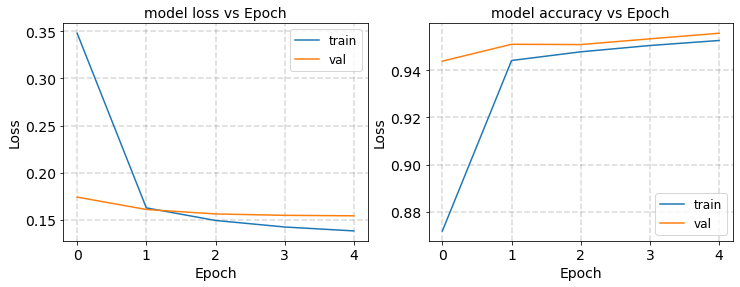

9
Epoch 1/5
1250/1250 - 4s - loss: 0.4766 - accuracy: 0.8102 - val_loss: 0.1808 - val_accuracy: 0.9296
Epoch 2/5
1250/1250 - 4s - loss: 0.1432 - accuracy: 0.9497 - val_loss: 0.1346 - val_accuracy: 0.9470
Epoch 3/5
1250/1250 - 3s - loss: 0.1127 - accuracy: 0.9624 - val_loss: 0.1232 - val_accuracy: 0.9517
Epoch 4/5
1250/1250 - 4s - loss: 0.1013 - accuracy: 0.9674 - val_loss: 0.1188 - val_accuracy: 0.9556
Epoch 5/5
1250/1250 - 3s - loss: 0.0948 - accuracy: 0.9701 - val_loss: 0.1165 - val_accuracy: 0.9581


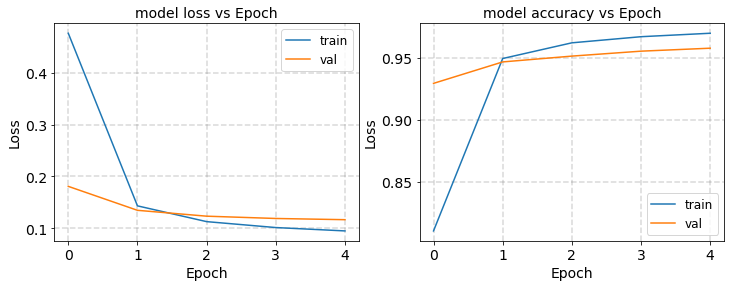

8
Epoch 1/5
1250/1250 - 3s - loss: 0.7793 - accuracy: 0.6319 - val_loss: 0.4320 - val_accuracy: 0.7869
Epoch 2/5
1250/1250 - 3s - loss: 0.3728 - accuracy: 0.8285 - val_loss: 0.2544 - val_accuracy: 0.8991
Epoch 3/5
1250/1250 - 3s - loss: 0.2591 - accuracy: 0.8921 - val_loss: 0.1977 - val_accuracy: 0.9227
Epoch 4/5
1250/1250 - 4s - loss: 0.2170 - accuracy: 0.9126 - val_loss: 0.1832 - val_accuracy: 0.9298
Epoch 5/5
1250/1250 - 3s - loss: 0.2003 - accuracy: 0.9203 - val_loss: 0.1776 - val_accuracy: 0.9337


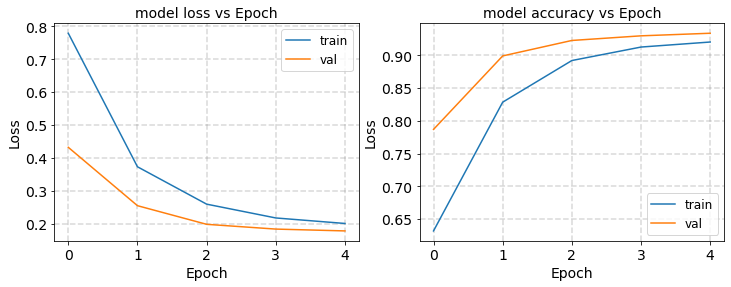

2
Epoch 1/5
1250/1250 - 4s - loss: 0.4831 - accuracy: 0.7932 - val_loss: 0.2325 - val_accuracy: 0.9066
Epoch 2/5
1250/1250 - 4s - loss: 0.2244 - accuracy: 0.9081 - val_loss: 0.1697 - val_accuracy: 0.9363
Epoch 3/5
1250/1250 - 3s - loss: 0.1816 - accuracy: 0.9262 - val_loss: 0.1425 - val_accuracy: 0.9520
Epoch 4/5
1250/1250 - 3s - loss: 0.1592 - accuracy: 0.9371 - val_loss: 0.1226 - val_accuracy: 0.9630
Epoch 5/5
1250/1250 - 3s - loss: 0.1420 - accuracy: 0.9441 - val_loss: 0.1096 - val_accuracy: 0.9629


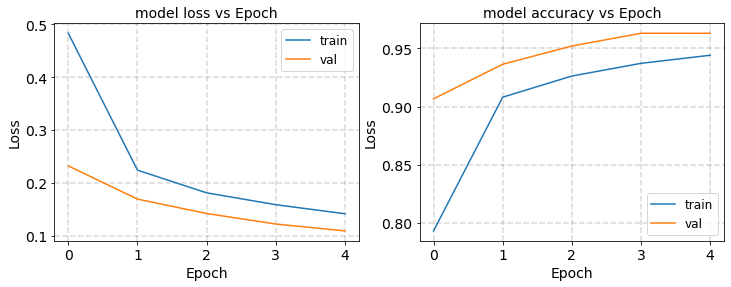

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_8  (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_9  (None, 32)                2082      
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 2s - loss: 1.0849 - accuracy: 0.6671 - val_loss: 0.5122 - val_accuracy: 0.8447
Epoch 2/10
1250/1250 - 2s - loss: 0.4687 - accuracy: 0.8505 - val_loss: 0.4106 - val_accuracy: 0.8722
Epoch 3/10
1250/1250 - 2s - loss: 0.403

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 3
round0 [3 8 9 2]
3
Epoch 1/5
1250/1250 - 2s - loss: 0.1673 - accuracy: 0.9423 - val_loss: 0.1104 - val_accuracy: 0.9635
Epoch 2/5
1250/1250 - 3s - loss: 0.0840 - accuracy: 0.9740 - val_loss: 0.0946 - val_accuracy: 0.9691
Epoch 3/5
1250/1250 - 2s - loss: 0.0589 - accuracy: 0.9829 - val_loss: 0.0747 - val_accuracy: 0.9786
Epoch 4/5
1250/1250 - 2s - loss: 0.0424 - accuracy: 0.9882 - val_loss: 0.0741 - val_accuracy: 0.9786
Epoch 5/5
1250/1250 - 2s - loss: 0.0313 - accuracy: 0.9921 - val_loss: 0.0727 - val_accuracy: 0.9786


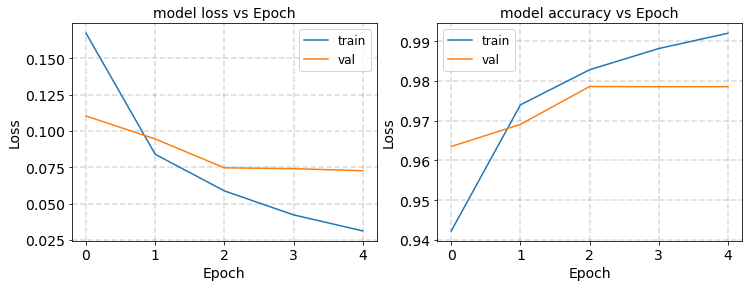

8
Epoch 1/5
1250/1250 - 2s - loss: 0.3060 - accuracy: 0.8762 - val_loss: 0.1372 - val_accuracy: 0.9535
Epoch 2/5
1250/1250 - 2s - loss: 0.1199 - accuracy: 0.9564 - val_loss: 0.1084 - val_accuracy: 0.9637
Epoch 3/5
1250/1250 - 2s - loss: 0.0889 - accuracy: 0.9680 - val_loss: 0.0961 - val_accuracy: 0.9668
Epoch 4/5
1250/1250 - 2s - loss: 0.0711 - accuracy: 0.9750 - val_loss: 0.0900 - val_accuracy: 0.9668
Epoch 5/5
1250/1250 - 2s - loss: 0.0582 - accuracy: 0.9798 - val_loss: 0.0874 - val_accuracy: 0.9740


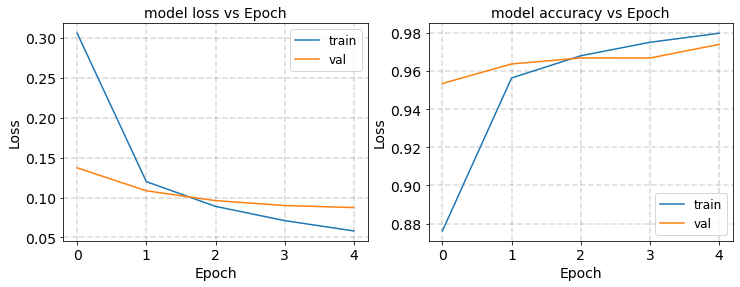

9
Epoch 1/5
1250/1250 - 2s - loss: 0.1953 - accuracy: 0.9391 - val_loss: 0.1096 - val_accuracy: 0.9732
Epoch 2/5
1250/1250 - 2s - loss: 0.0764 - accuracy: 0.9754 - val_loss: 0.0809 - val_accuracy: 0.9779
Epoch 3/5
1250/1250 - 2s - loss: 0.0549 - accuracy: 0.9816 - val_loss: 0.0742 - val_accuracy: 0.9811
Epoch 4/5
1250/1250 - 2s - loss: 0.0432 - accuracy: 0.9854 - val_loss: 0.0678 - val_accuracy: 0.9819
Epoch 5/5
1250/1250 - 2s - loss: 0.0340 - accuracy: 0.9883 - val_loss: 0.0651 - val_accuracy: 0.9826


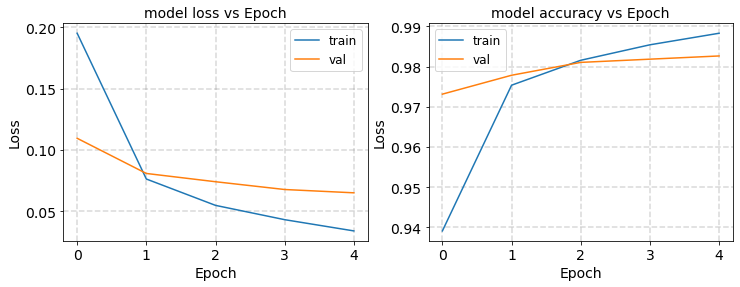

2
Epoch 1/5
1250/1250 - 2s - loss: 0.4069 - accuracy: 0.8676 - val_loss: 0.1831 - val_accuracy: 0.9415
Epoch 2/5
1250/1250 - 2s - loss: 0.1506 - accuracy: 0.9491 - val_loss: 0.1307 - val_accuracy: 0.9597
Epoch 3/5
1250/1250 - 2s - loss: 0.1101 - accuracy: 0.9661 - val_loss: 0.1084 - val_accuracy: 0.9723
Epoch 4/5
1250/1250 - 2s - loss: 0.0886 - accuracy: 0.9729 - val_loss: 0.0976 - val_accuracy: 0.9747
Epoch 5/5
1250/1250 - 2s - loss: 0.0759 - accuracy: 0.9761 - val_loss: 0.0869 - val_accuracy: 0.9771


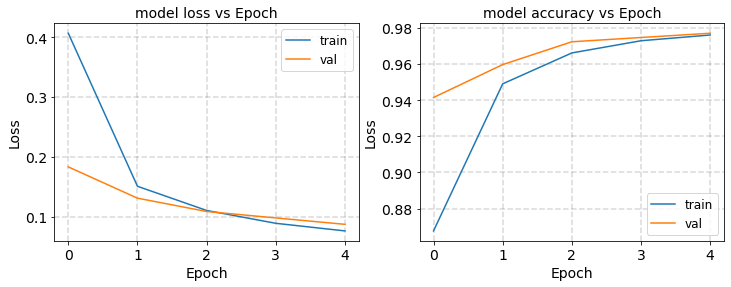

round1 [9 3 8 2]
9
Epoch 1/5
1250/1250 - 2s - loss: 0.3060 - accuracy: 0.8971 - val_loss: 0.1290 - val_accuracy: 0.9596
Epoch 2/5
1250/1250 - 2s - loss: 0.0802 - accuracy: 0.9764 - val_loss: 0.0998 - val_accuracy: 0.9675
Epoch 3/5
1250/1250 - 2s - loss: 0.0600 - accuracy: 0.9825 - val_loss: 0.0891 - val_accuracy: 0.9763
Epoch 4/5
1250/1250 - 2s - loss: 0.0467 - accuracy: 0.9861 - val_loss: 0.0864 - val_accuracy: 0.9779
Epoch 5/5
1250/1250 - 2s - loss: 0.0374 - accuracy: 0.9888 - val_loss: 0.0847 - val_accuracy: 0.9771


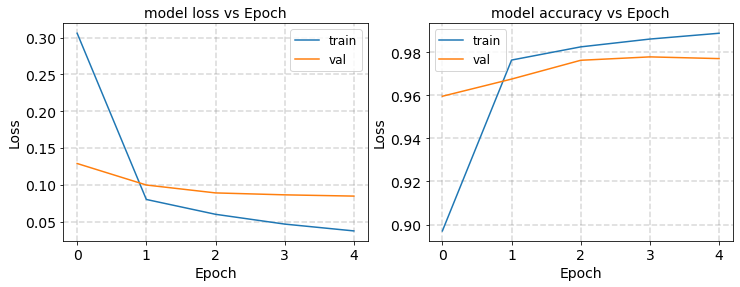

3
Epoch 1/5
1250/1250 - 2s - loss: 0.3135 - accuracy: 0.9025 - val_loss: 0.1073 - val_accuracy: 0.9691
Epoch 2/5
1250/1250 - 2s - loss: 0.0686 - accuracy: 0.9811 - val_loss: 0.0937 - val_accuracy: 0.9754
Epoch 3/5
1250/1250 - 2s - loss: 0.0510 - accuracy: 0.9875 - val_loss: 0.0875 - val_accuracy: 0.9786
Epoch 4/5
1250/1250 - 2s - loss: 0.0411 - accuracy: 0.9908 - val_loss: 0.0837 - val_accuracy: 0.9779
Epoch 5/5
1250/1250 - 2s - loss: 0.0339 - accuracy: 0.9926 - val_loss: 0.0832 - val_accuracy: 0.9779


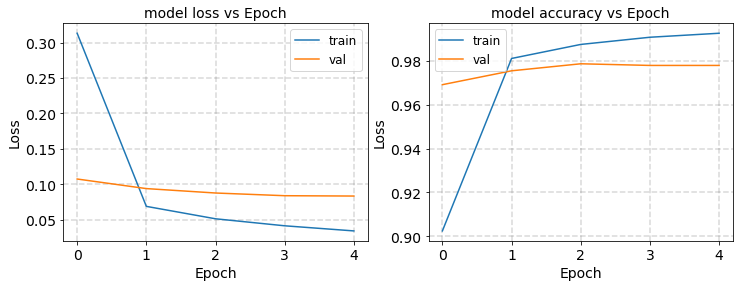

8
Epoch 1/5
1250/1250 - 3s - loss: 0.3171 - accuracy: 0.8826 - val_loss: 0.1762 - val_accuracy: 0.9362
Epoch 2/5
1250/1250 - 3s - loss: 0.1363 - accuracy: 0.9491 - val_loss: 0.1508 - val_accuracy: 0.9488
Epoch 3/5
1250/1250 - 3s - loss: 0.1096 - accuracy: 0.9606 - val_loss: 0.1320 - val_accuracy: 0.9583
Epoch 4/5
1250/1250 - 3s - loss: 0.0933 - accuracy: 0.9679 - val_loss: 0.1257 - val_accuracy: 0.9630
Epoch 5/5
1250/1250 - 3s - loss: 0.0832 - accuracy: 0.9718 - val_loss: 0.1189 - val_accuracy: 0.9638


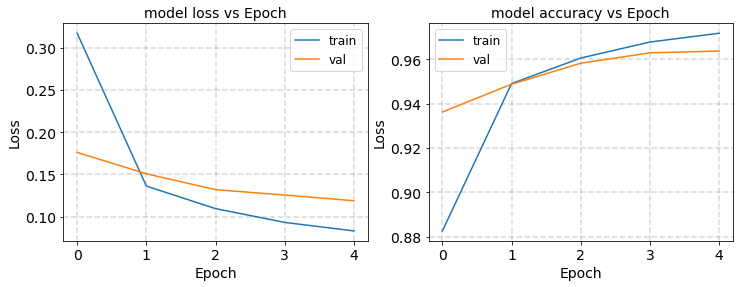

2
Epoch 1/5
1250/1250 - 3s - loss: 0.3474 - accuracy: 0.8793 - val_loss: 0.1661 - val_accuracy: 0.9441
Epoch 2/5
1250/1250 - 4s - loss: 0.1342 - accuracy: 0.9500 - val_loss: 0.1274 - val_accuracy: 0.9590
Epoch 3/5
1250/1250 - 3s - loss: 0.1016 - accuracy: 0.9625 - val_loss: 0.1101 - val_accuracy: 0.9676
Epoch 4/5
1250/1250 - 3s - loss: 0.0831 - accuracy: 0.9711 - val_loss: 0.1004 - val_accuracy: 0.9739
Epoch 5/5
1250/1250 - 3s - loss: 0.0732 - accuracy: 0.9761 - val_loss: 0.0967 - val_accuracy: 0.9755


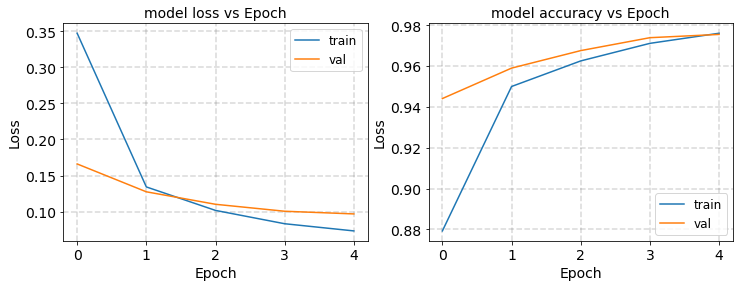

round2 [2 3 8 9]
2
Epoch 1/5
1250/1250 - 4s - loss: 0.0652 - accuracy: 0.9791 - val_loss: 0.0954 - val_accuracy: 0.9763
Epoch 2/5
1250/1250 - 4s - loss: 0.0600 - accuracy: 0.9812 - val_loss: 0.0924 - val_accuracy: 0.9755
Epoch 3/5
1250/1250 - 3s - loss: 0.0558 - accuracy: 0.9830 - val_loss: 0.0940 - val_accuracy: 0.9771
Epoch 4/5
1250/1250 - 3s - loss: 0.0520 - accuracy: 0.9837 - val_loss: 0.0949 - val_accuracy: 0.9747
Epoch 5/5
1250/1250 - 4s - loss: 0.0491 - accuracy: 0.9852 - val_loss: 0.0899 - val_accuracy: 0.9755


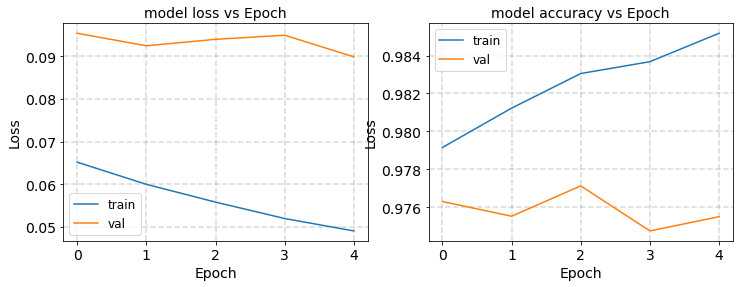

3
Epoch 1/5
1250/1250 - 4s - loss: 0.3139 - accuracy: 0.9223 - val_loss: 0.1432 - val_accuracy: 0.9762
Epoch 2/5
1250/1250 - 3s - loss: 0.0537 - accuracy: 0.9875 - val_loss: 0.1217 - val_accuracy: 0.9786
Epoch 3/5
1250/1250 - 4s - loss: 0.0382 - accuracy: 0.9911 - val_loss: 0.1135 - val_accuracy: 0.9794
Epoch 4/5
1250/1250 - 3s - loss: 0.0299 - accuracy: 0.9930 - val_loss: 0.1066 - val_accuracy: 0.9803
Epoch 5/5
1250/1250 - 3s - loss: 0.0235 - accuracy: 0.9946 - val_loss: 0.1043 - val_accuracy: 0.9811


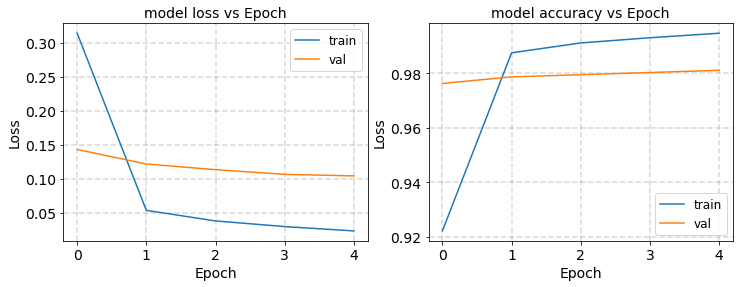

8
Epoch 1/5
1250/1250 - 4s - loss: 0.3094 - accuracy: 0.8929 - val_loss: 0.1579 - val_accuracy: 0.9394
Epoch 2/5
1250/1250 - 4s - loss: 0.1389 - accuracy: 0.9464 - val_loss: 0.1302 - val_accuracy: 0.9512
Epoch 3/5
1250/1250 - 4s - loss: 0.1134 - accuracy: 0.9577 - val_loss: 0.1235 - val_accuracy: 0.9567
Epoch 4/5
1250/1250 - 4s - loss: 0.0975 - accuracy: 0.9639 - val_loss: 0.1262 - val_accuracy: 0.9567
Epoch 5/5
1250/1250 - 3s - loss: 0.0869 - accuracy: 0.9683 - val_loss: 0.1253 - val_accuracy: 0.9567


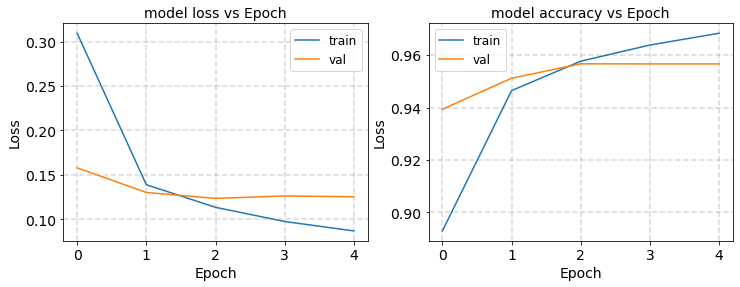

9
Epoch 1/5
1250/1250 - 4s - loss: 0.2808 - accuracy: 0.9097 - val_loss: 0.1492 - val_accuracy: 0.9486
Epoch 2/5
1250/1250 - 3s - loss: 0.1175 - accuracy: 0.9609 - val_loss: 0.1301 - val_accuracy: 0.9588
Epoch 3/5
1250/1250 - 4s - loss: 0.0992 - accuracy: 0.9681 - val_loss: 0.1198 - val_accuracy: 0.9620
Epoch 4/5
1250/1250 - 4s - loss: 0.0826 - accuracy: 0.9738 - val_loss: 0.1170 - val_accuracy: 0.9643
Epoch 5/5
1250/1250 - 4s - loss: 0.0694 - accuracy: 0.9779 - val_loss: 0.1193 - val_accuracy: 0.9675


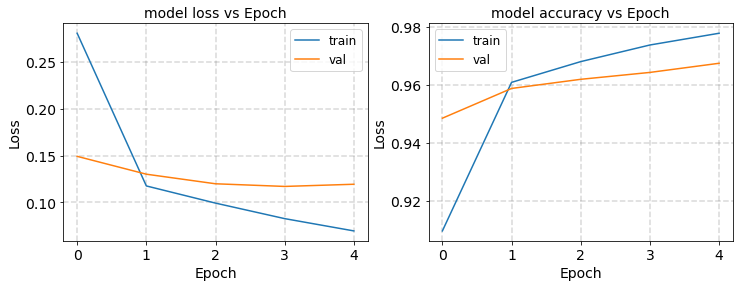

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_12 (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_13 (None, 32)                2082      
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 2s - loss: 0.7440 - accuracy: 0.7437 - val_loss: 0.4621 - val_accuracy: 0.8628
Epoch 2/10
1250/1250 - 2s - loss: 0.4555 - accuracy: 0.8468 - val_loss: 0.3934 - val_accuracy: 0.8698
Epoch 3/10
1250/1250 - 2s - loss: 0.412

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 4
round0 [9 2 3 8]
9
Epoch 1/5
1250/1250 - 4s - loss: 0.1105 - accuracy: 0.9633 - val_loss: 0.0734 - val_accuracy: 0.9747
Epoch 2/5
1250/1250 - 3s - loss: 0.0413 - accuracy: 0.9863 - val_loss: 0.0666 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 2s - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.0642 - val_accuracy: 0.9819
Epoch 4/5
1250/1250 - 3s - loss: 0.0146 - accuracy: 0.9964 - val_loss: 0.0645 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 3s - loss: 0.0087 - accuracy: 0.9981 - val_loss: 0.0660 - val_accuracy: 0.9842


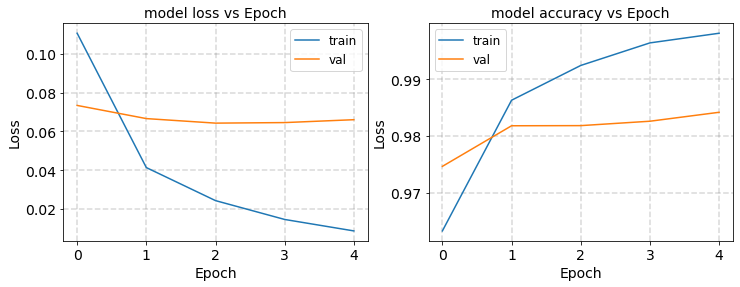

2
Epoch 1/5
1250/1250 - 4s - loss: 0.3044 - accuracy: 0.9088 - val_loss: 0.1487 - val_accuracy: 0.9717
Epoch 2/5
1250/1250 - 3s - loss: 0.1087 - accuracy: 0.9755 - val_loss: 0.0983 - val_accuracy: 0.9804
Epoch 3/5
1250/1250 - 3s - loss: 0.0738 - accuracy: 0.9829 - val_loss: 0.0800 - val_accuracy: 0.9819
Epoch 4/5
1250/1250 - 3s - loss: 0.0560 - accuracy: 0.9868 - val_loss: 0.0708 - val_accuracy: 0.9843
Epoch 5/5
1250/1250 - 3s - loss: 0.0447 - accuracy: 0.9897 - val_loss: 0.0662 - val_accuracy: 0.9835


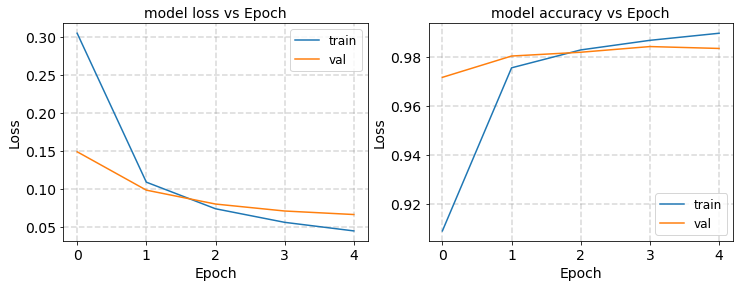

3
Epoch 1/5
1250/1250 - 3s - loss: 0.2271 - accuracy: 0.9190 - val_loss: 0.1339 - val_accuracy: 0.9541
Epoch 2/5
1250/1250 - 3s - loss: 0.1112 - accuracy: 0.9616 - val_loss: 0.1136 - val_accuracy: 0.9644
Epoch 3/5
1250/1250 - 3s - loss: 0.0891 - accuracy: 0.9717 - val_loss: 0.1082 - val_accuracy: 0.9668
Epoch 4/5
1250/1250 - 3s - loss: 0.0751 - accuracy: 0.9765 - val_loss: 0.1088 - val_accuracy: 0.9676
Epoch 5/5
1250/1250 - 3s - loss: 0.0633 - accuracy: 0.9811 - val_loss: 0.1059 - val_accuracy: 0.9692


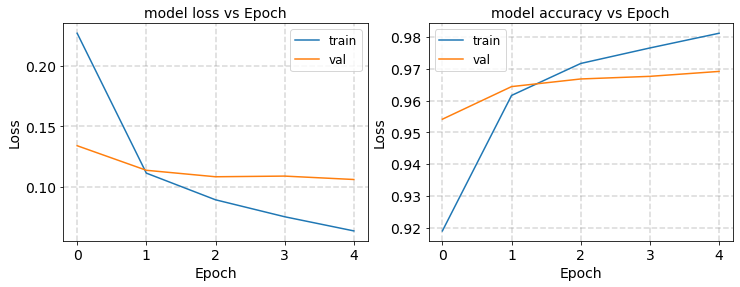

8
Epoch 1/5
1250/1250 - 4s - loss: 0.3563 - accuracy: 0.8646 - val_loss: 0.1817 - val_accuracy: 0.9289
Epoch 2/5
1250/1250 - 4s - loss: 0.1490 - accuracy: 0.9454 - val_loss: 0.1263 - val_accuracy: 0.9574
Epoch 3/5
1250/1250 - 4s - loss: 0.0951 - accuracy: 0.9678 - val_loss: 0.0874 - val_accuracy: 0.9692
Epoch 4/5
1250/1250 - 4s - loss: 0.0680 - accuracy: 0.9787 - val_loss: 0.0778 - val_accuracy: 0.9730
Epoch 5/5
1250/1250 - 3s - loss: 0.0526 - accuracy: 0.9830 - val_loss: 0.0644 - val_accuracy: 0.9731


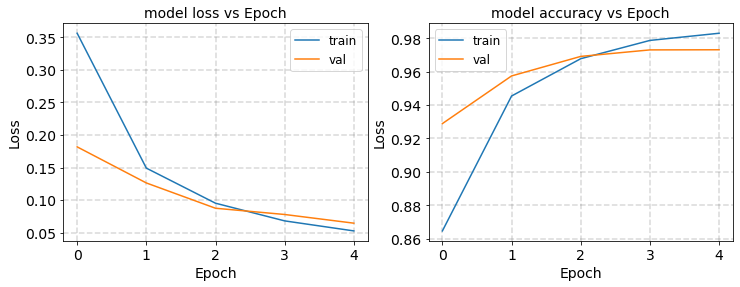

round1 [3 2 9 8]
3
Epoch 1/5
1250/1250 - 3s - loss: 0.2029 - accuracy: 0.9348 - val_loss: 0.1341 - val_accuracy: 0.9605
Epoch 2/5
1250/1250 - 3s - loss: 0.0813 - accuracy: 0.9732 - val_loss: 0.1207 - val_accuracy: 0.9653
Epoch 3/5
1250/1250 - 3s - loss: 0.0669 - accuracy: 0.9779 - val_loss: 0.1173 - val_accuracy: 0.9668
Epoch 4/5
1250/1250 - 3s - loss: 0.0584 - accuracy: 0.9811 - val_loss: 0.1173 - val_accuracy: 0.9708
Epoch 5/5
1250/1250 - 3s - loss: 0.0511 - accuracy: 0.9844 - val_loss: 0.1173 - val_accuracy: 0.9700


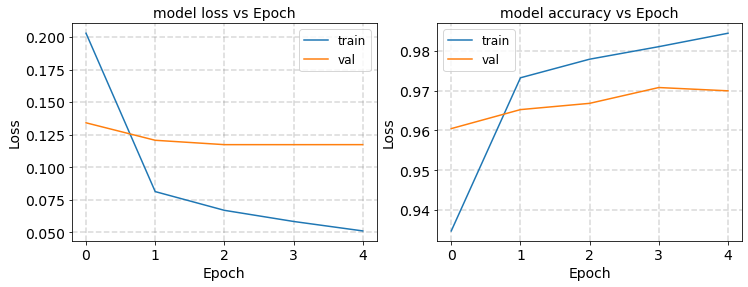

2
Epoch 1/5
1250/1250 - 4s - loss: 0.2045 - accuracy: 0.9473 - val_loss: 0.1072 - val_accuracy: 0.9717
Epoch 2/5
1250/1250 - 3s - loss: 0.0701 - accuracy: 0.9798 - val_loss: 0.1035 - val_accuracy: 0.9740
Epoch 3/5
1250/1250 - 3s - loss: 0.0582 - accuracy: 0.9839 - val_loss: 0.0960 - val_accuracy: 0.9749
Epoch 4/5
1250/1250 - 4s - loss: 0.0500 - accuracy: 0.9862 - val_loss: 0.0907 - val_accuracy: 0.9764
Epoch 5/5
1250/1250 - 4s - loss: 0.0431 - accuracy: 0.9887 - val_loss: 0.0950 - val_accuracy: 0.9764


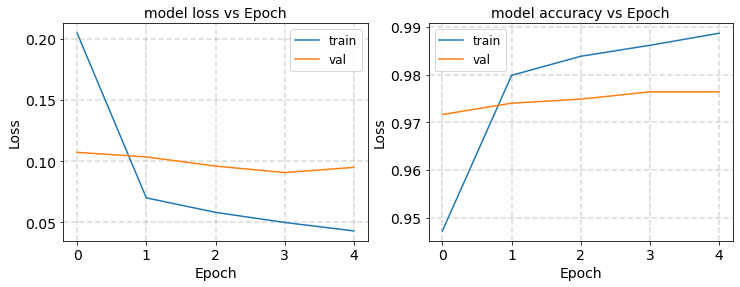

9
Epoch 1/5
1250/1250 - 4s - loss: 0.3214 - accuracy: 0.9149 - val_loss: 0.1156 - val_accuracy: 0.9661
Epoch 2/5
1250/1250 - 4s - loss: 0.0680 - accuracy: 0.9791 - val_loss: 0.1026 - val_accuracy: 0.9700
Epoch 3/5
1250/1250 - 4s - loss: 0.0510 - accuracy: 0.9841 - val_loss: 0.0915 - val_accuracy: 0.9771
Epoch 4/5
1250/1250 - 3s - loss: 0.0404 - accuracy: 0.9870 - val_loss: 0.0885 - val_accuracy: 0.9763
Epoch 5/5
1250/1250 - 4s - loss: 0.0330 - accuracy: 0.9900 - val_loss: 0.0844 - val_accuracy: 0.9779


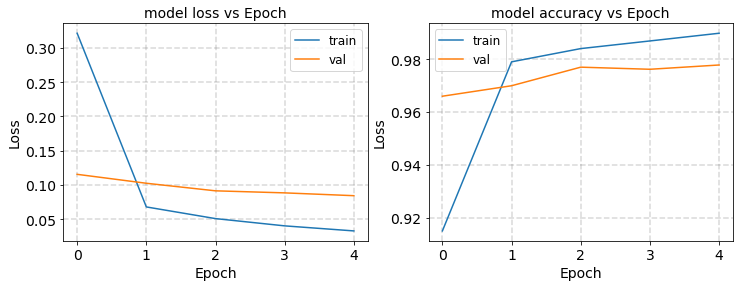

8
Epoch 1/5
1250/1250 - 3s - loss: 0.3373 - accuracy: 0.8918 - val_loss: 0.1584 - val_accuracy: 0.9384
Epoch 2/5
1250/1250 - 3s - loss: 0.1124 - accuracy: 0.9601 - val_loss: 0.1177 - val_accuracy: 0.9573
Epoch 3/5
1250/1250 - 3s - loss: 0.0798 - accuracy: 0.9725 - val_loss: 0.1031 - val_accuracy: 0.9613
Epoch 4/5
1250/1250 - 3s - loss: 0.0639 - accuracy: 0.9789 - val_loss: 0.0970 - val_accuracy: 0.9692
Epoch 5/5
1250/1250 - 3s - loss: 0.0531 - accuracy: 0.9839 - val_loss: 0.0981 - val_accuracy: 0.9692


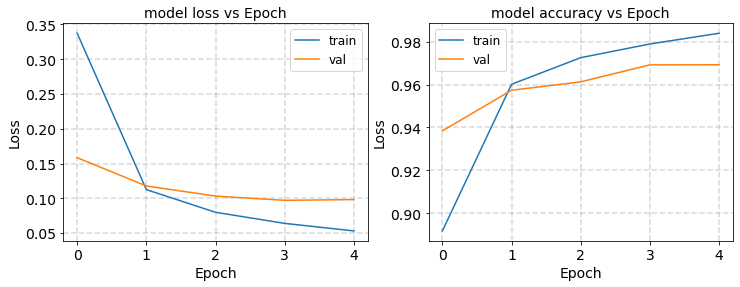

round2 [2 8 3 9]
2
Epoch 1/5
1250/1250 - 3s - loss: 0.2716 - accuracy: 0.9131 - val_loss: 0.1247 - val_accuracy: 0.9582
Epoch 2/5
1250/1250 - 3s - loss: 0.1059 - accuracy: 0.9634 - val_loss: 0.1013 - val_accuracy: 0.9660
Epoch 3/5
1250/1250 - 3s - loss: 0.0879 - accuracy: 0.9705 - val_loss: 0.0911 - val_accuracy: 0.9683
Epoch 4/5
1250/1250 - 3s - loss: 0.0732 - accuracy: 0.9763 - val_loss: 0.0848 - val_accuracy: 0.9715
Epoch 5/5
1250/1250 - 3s - loss: 0.0623 - accuracy: 0.9800 - val_loss: 0.0806 - val_accuracy: 0.9754


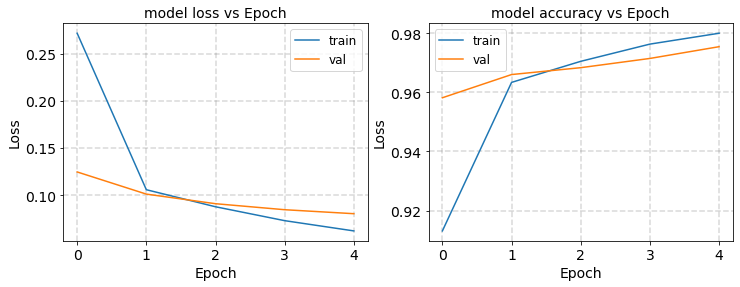

8
Epoch 1/5
1250/1250 - 3s - loss: 0.2680 - accuracy: 0.9189 - val_loss: 0.1059 - val_accuracy: 0.9644
Epoch 2/5
1250/1250 - 3s - loss: 0.0653 - accuracy: 0.9783 - val_loss: 0.0955 - val_accuracy: 0.9692
Epoch 3/5
1250/1250 - 3s - loss: 0.0513 - accuracy: 0.9841 - val_loss: 0.0959 - val_accuracy: 0.9707
Epoch 4/5
1250/1250 - 3s - loss: 0.0432 - accuracy: 0.9876 - val_loss: 0.0981 - val_accuracy: 0.9715
Epoch 5/5
1250/1250 - 3s - loss: 0.0377 - accuracy: 0.9890 - val_loss: 0.1041 - val_accuracy: 0.9684


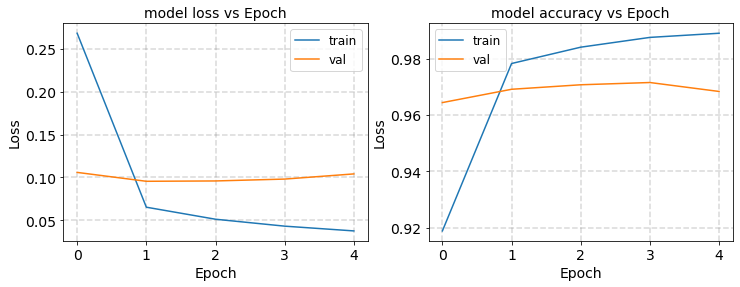

3
Epoch 1/5
1250/1250 - 3s - loss: 0.3118 - accuracy: 0.9141 - val_loss: 0.1553 - val_accuracy: 0.9549
Epoch 2/5
1250/1250 - 3s - loss: 0.1041 - accuracy: 0.9677 - val_loss: 0.1362 - val_accuracy: 0.9612
Epoch 3/5
1250/1250 - 3s - loss: 0.0818 - accuracy: 0.9749 - val_loss: 0.1262 - val_accuracy: 0.9644
Epoch 4/5
1250/1250 - 3s - loss: 0.0695 - accuracy: 0.9790 - val_loss: 0.1264 - val_accuracy: 0.9660
Epoch 5/5
1250/1250 - 3s - loss: 0.0609 - accuracy: 0.9818 - val_loss: 0.1184 - val_accuracy: 0.9691


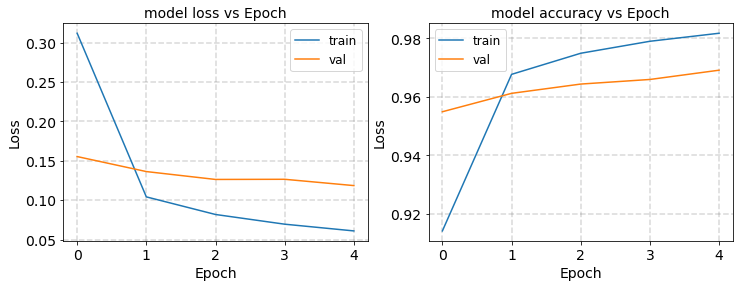

9
Epoch 1/5
1250/1250 - 2s - loss: 0.2138 - accuracy: 0.9402 - val_loss: 0.1004 - val_accuracy: 0.9700
Epoch 2/5
1250/1250 - 2s - loss: 0.0438 - accuracy: 0.9866 - val_loss: 0.0864 - val_accuracy: 0.9724
Epoch 3/5
1250/1250 - 2s - loss: 0.0343 - accuracy: 0.9900 - val_loss: 0.0807 - val_accuracy: 0.9709
Epoch 4/5
1250/1250 - 2s - loss: 0.0272 - accuracy: 0.9927 - val_loss: 0.0794 - val_accuracy: 0.9771
Epoch 5/5
1250/1250 - 2s - loss: 0.0227 - accuracy: 0.9940 - val_loss: 0.0815 - val_accuracy: 0.9771


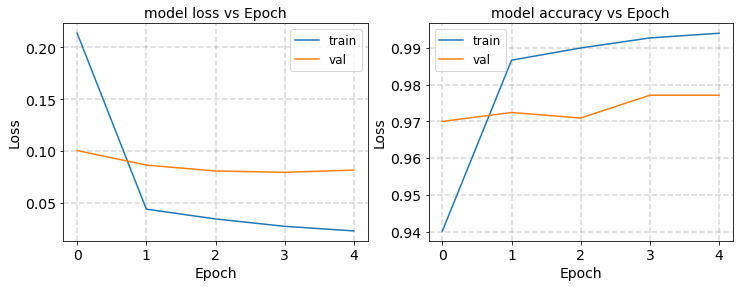

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_16 (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_17 (None, 32)                2082      
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 1s - loss: 0.9010 - accuracy: 0.7060 - val_loss: 0.4959 - val_accuracy: 0.8348
Epoch 2/10
1250/1250 - 1s - loss: 0.4425 - accuracy: 0.8508 - val_loss: 0.4089 - val_accuracy: 0.8489
Epoch 3/10
1250/1250 - 1s - loss: 0.382

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 5
round0 [9 2 8 3]
9
Epoch 1/5
1250/1250 - 3s - loss: 0.1293 - accuracy: 0.9578 - val_loss: 0.0815 - val_accuracy: 0.9746
Epoch 2/5
1250/1250 - 2s - loss: 0.0398 - accuracy: 0.9873 - val_loss: 0.0680 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 3s - loss: 0.0251 - accuracy: 0.9916 - val_loss: 0.0641 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 2s - loss: 0.0165 - accuracy: 0.9947 - val_loss: 0.0695 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 3s - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.0772 - val_accuracy: 0.9787


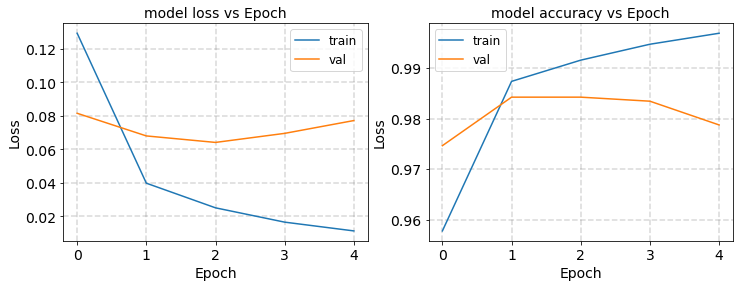

2
Epoch 1/5
1250/1250 - 2s - loss: 0.2968 - accuracy: 0.8988 - val_loss: 0.1726 - val_accuracy: 0.9597
Epoch 2/5
1250/1250 - 3s - loss: 0.1434 - accuracy: 0.9614 - val_loss: 0.1226 - val_accuracy: 0.9693
Epoch 3/5
1250/1250 - 3s - loss: 0.1129 - accuracy: 0.9688 - val_loss: 0.0999 - val_accuracy: 0.9748
Epoch 4/5
1250/1250 - 3s - loss: 0.0955 - accuracy: 0.9726 - val_loss: 0.0883 - val_accuracy: 0.9772
Epoch 5/5
1250/1250 - 2s - loss: 0.0834 - accuracy: 0.9758 - val_loss: 0.0847 - val_accuracy: 0.9787


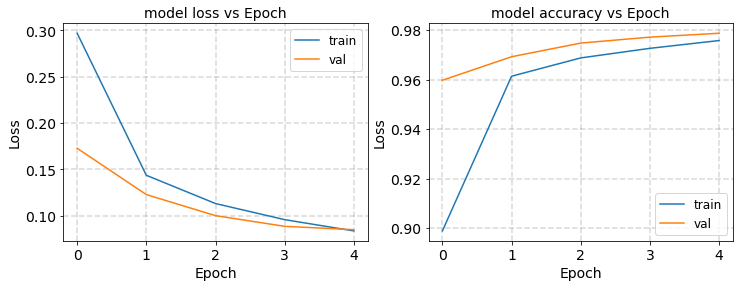

8
Epoch 1/5
1250/1250 - 2s - loss: 0.4360 - accuracy: 0.8288 - val_loss: 0.1622 - val_accuracy: 0.9408
Epoch 2/5
1250/1250 - 2s - loss: 0.1463 - accuracy: 0.9489 - val_loss: 0.1317 - val_accuracy: 0.9534
Epoch 3/5
1250/1250 - 2s - loss: 0.1213 - accuracy: 0.9600 - val_loss: 0.1204 - val_accuracy: 0.9622
Epoch 4/5
1250/1250 - 2s - loss: 0.1060 - accuracy: 0.9660 - val_loss: 0.1113 - val_accuracy: 0.9575
Epoch 5/5
1250/1250 - 3s - loss: 0.0946 - accuracy: 0.9701 - val_loss: 0.1114 - val_accuracy: 0.9582


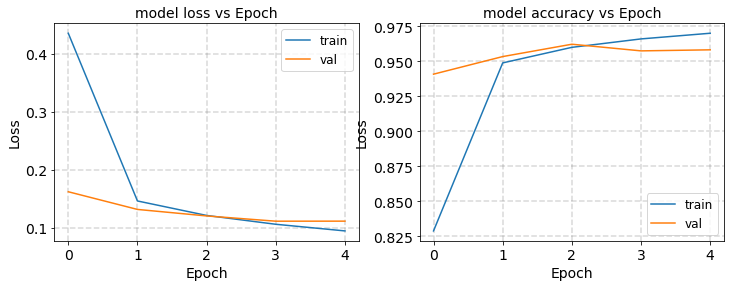

3
Epoch 1/5
1250/1250 - 3s - loss: 0.3613 - accuracy: 0.8724 - val_loss: 0.1630 - val_accuracy: 0.9502
Epoch 2/5
1250/1250 - 3s - loss: 0.1491 - accuracy: 0.9518 - val_loss: 0.1398 - val_accuracy: 0.9612
Epoch 3/5
1250/1250 - 3s - loss: 0.1316 - accuracy: 0.9578 - val_loss: 0.1307 - val_accuracy: 0.9635
Epoch 4/5
1250/1250 - 3s - loss: 0.1215 - accuracy: 0.9611 - val_loss: 0.1246 - val_accuracy: 0.9651
Epoch 5/5
1250/1250 - 3s - loss: 0.1144 - accuracy: 0.9633 - val_loss: 0.1226 - val_accuracy: 0.9628


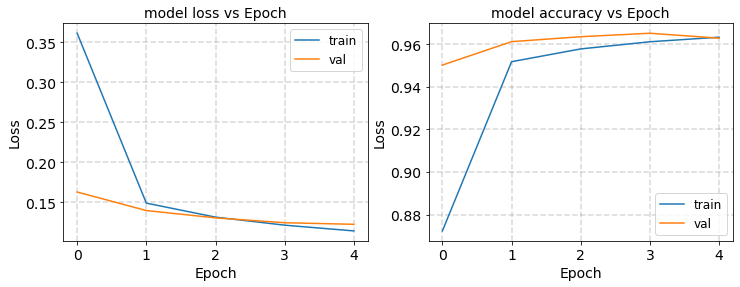

round1 [8 9 2 3]
8
Epoch 1/5
1250/1250 - 3s - loss: 0.3221 - accuracy: 0.8821 - val_loss: 0.1480 - val_accuracy: 0.9472
Epoch 2/5
1250/1250 - 3s - loss: 0.1176 - accuracy: 0.9595 - val_loss: 0.1272 - val_accuracy: 0.9527
Epoch 3/5
1250/1250 - 3s - loss: 0.1013 - accuracy: 0.9656 - val_loss: 0.1233 - val_accuracy: 0.9551
Epoch 4/5
1250/1250 - 3s - loss: 0.0917 - accuracy: 0.9691 - val_loss: 0.1252 - val_accuracy: 0.9567
Epoch 5/5
1250/1250 - 3s - loss: 0.0839 - accuracy: 0.9719 - val_loss: 0.1261 - val_accuracy: 0.9558


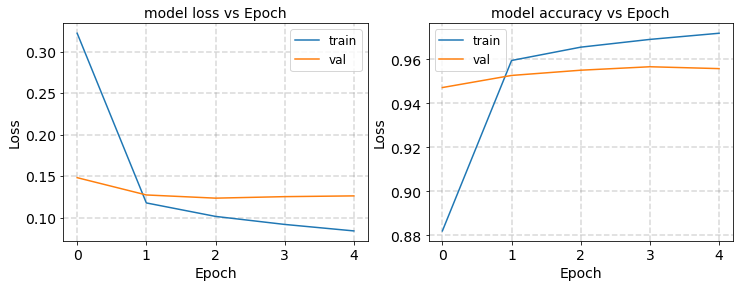

9
Epoch 1/5
1250/1250 - 3s - loss: 0.3988 - accuracy: 0.8544 - val_loss: 0.1625 - val_accuracy: 0.9392
Epoch 2/5
1250/1250 - 3s - loss: 0.1275 - accuracy: 0.9560 - val_loss: 0.1281 - val_accuracy: 0.9519
Epoch 3/5
1250/1250 - 3s - loss: 0.1005 - accuracy: 0.9669 - val_loss: 0.1153 - val_accuracy: 0.9574
Epoch 4/5
1250/1250 - 3s - loss: 0.0867 - accuracy: 0.9720 - val_loss: 0.1069 - val_accuracy: 0.9629
Epoch 5/5
1250/1250 - 3s - loss: 0.0776 - accuracy: 0.9750 - val_loss: 0.1035 - val_accuracy: 0.9636


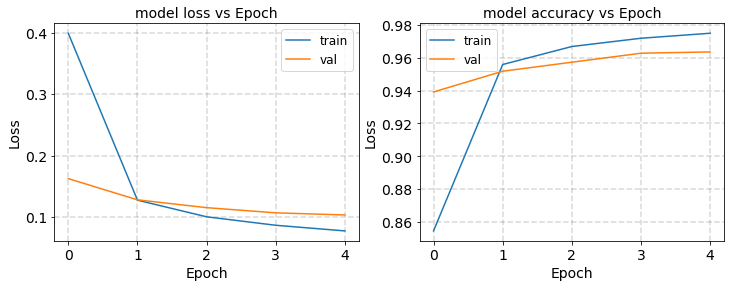

2
Epoch 1/5
1250/1250 - 3s - loss: 0.5401 - accuracy: 0.7746 - val_loss: 0.2563 - val_accuracy: 0.9052
Epoch 2/5
1250/1250 - 3s - loss: 0.1862 - accuracy: 0.9283 - val_loss: 0.1772 - val_accuracy: 0.9391
Epoch 3/5
1250/1250 - 4s - loss: 0.1470 - accuracy: 0.9454 - val_loss: 0.1468 - val_accuracy: 0.9518
Epoch 4/5
1250/1250 - 4s - loss: 0.1286 - accuracy: 0.9549 - val_loss: 0.1262 - val_accuracy: 0.9621
Epoch 5/5
1250/1250 - 3s - loss: 0.1169 - accuracy: 0.9595 - val_loss: 0.1197 - val_accuracy: 0.9676


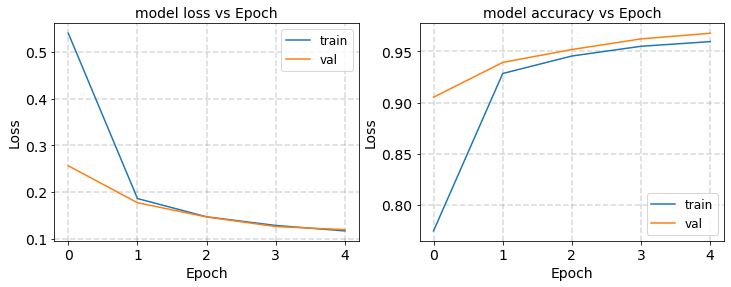

3
Epoch 1/5
1250/1250 - 4s - loss: 0.5127 - accuracy: 0.7862 - val_loss: 0.2238 - val_accuracy: 0.9178
Epoch 2/5
1250/1250 - 4s - loss: 0.1944 - accuracy: 0.9326 - val_loss: 0.1786 - val_accuracy: 0.9391
Epoch 3/5
1250/1250 - 3s - loss: 0.1652 - accuracy: 0.9421 - val_loss: 0.1623 - val_accuracy: 0.9486
Epoch 4/5
1250/1250 - 4s - loss: 0.1521 - accuracy: 0.9471 - val_loss: 0.1552 - val_accuracy: 0.9517
Epoch 5/5
1250/1250 - 3s - loss: 0.1446 - accuracy: 0.9510 - val_loss: 0.1506 - val_accuracy: 0.9541


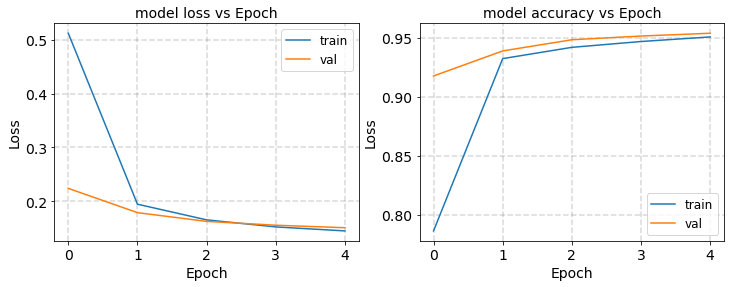

round2 [3 2 9 8]
3
Epoch 1/5
1250/1250 - 3s - loss: 0.1390 - accuracy: 0.9532 - val_loss: 0.1485 - val_accuracy: 0.9549
Epoch 2/5
1250/1250 - 4s - loss: 0.1334 - accuracy: 0.9544 - val_loss: 0.1455 - val_accuracy: 0.9549
Epoch 3/5
1250/1250 - 4s - loss: 0.1282 - accuracy: 0.9553 - val_loss: 0.1436 - val_accuracy: 0.9549
Epoch 4/5
1250/1250 - 3s - loss: 0.1233 - accuracy: 0.9563 - val_loss: 0.1425 - val_accuracy: 0.9541
Epoch 5/5
1250/1250 - 4s - loss: 0.1193 - accuracy: 0.9577 - val_loss: 0.1417 - val_accuracy: 0.9542


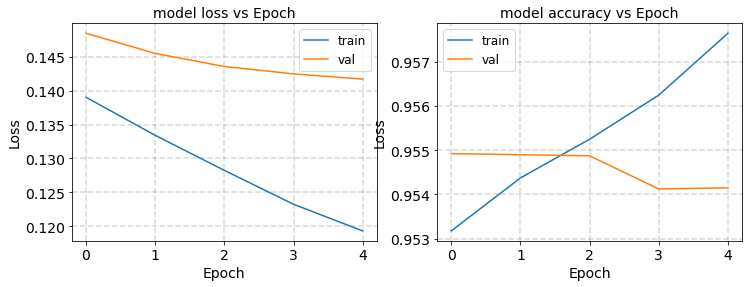

2
Epoch 1/5
1250/1250 - 4s - loss: 0.3091 - accuracy: 0.8871 - val_loss: 0.1384 - val_accuracy: 0.9565
Epoch 2/5
1250/1250 - 3s - loss: 0.1327 - accuracy: 0.9513 - val_loss: 0.1152 - val_accuracy: 0.9668
Epoch 3/5
1250/1250 - 3s - loss: 0.1170 - accuracy: 0.9586 - val_loss: 0.1063 - val_accuracy: 0.9676
Epoch 4/5
1250/1250 - 3s - loss: 0.1078 - accuracy: 0.9620 - val_loss: 0.1025 - val_accuracy: 0.9676
Epoch 5/5
1250/1250 - 4s - loss: 0.1004 - accuracy: 0.9644 - val_loss: 0.0978 - val_accuracy: 0.9668


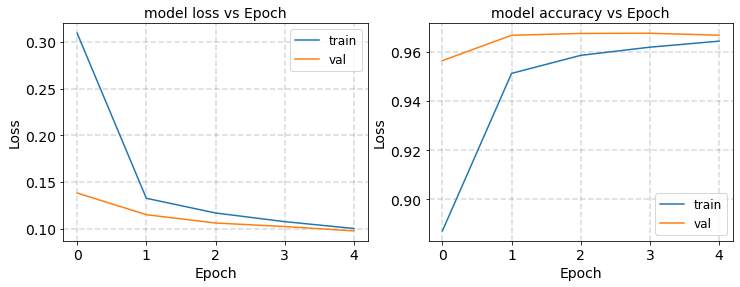

9
Epoch 1/5
1250/1250 - 4s - loss: 0.5108 - accuracy: 0.8017 - val_loss: 0.1933 - val_accuracy: 0.9345
Epoch 2/5
1250/1250 - 4s - loss: 0.1451 - accuracy: 0.9516 - val_loss: 0.1365 - val_accuracy: 0.9557
Epoch 3/5
1250/1250 - 3s - loss: 0.1088 - accuracy: 0.9658 - val_loss: 0.1185 - val_accuracy: 0.9620
Epoch 4/5
1250/1250 - 4s - loss: 0.0936 - accuracy: 0.9712 - val_loss: 0.1105 - val_accuracy: 0.9620
Epoch 5/5
1250/1250 - 4s - loss: 0.0845 - accuracy: 0.9735 - val_loss: 0.1036 - val_accuracy: 0.9636


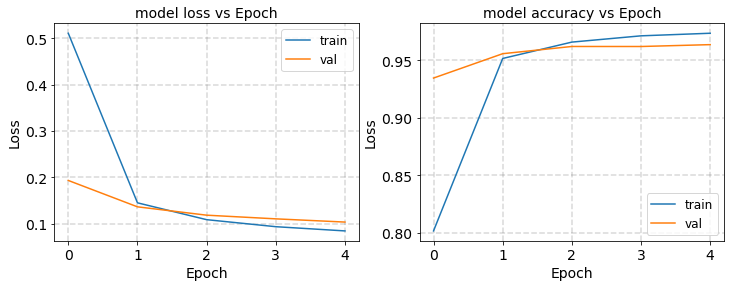

8
Epoch 1/5
1250/1250 - 3s - loss: 0.6451 - accuracy: 0.7164 - val_loss: 0.2815 - val_accuracy: 0.8862
Epoch 2/5
1250/1250 - 3s - loss: 0.2313 - accuracy: 0.9125 - val_loss: 0.1939 - val_accuracy: 0.9319
Epoch 3/5
1250/1250 - 4s - loss: 0.1834 - accuracy: 0.9295 - val_loss: 0.1750 - val_accuracy: 0.9351
Epoch 4/5
1250/1250 - 3s - loss: 0.1608 - accuracy: 0.9398 - val_loss: 0.1624 - val_accuracy: 0.9398
Epoch 5/5
1250/1250 - 4s - loss: 0.1449 - accuracy: 0.9479 - val_loss: 0.1598 - val_accuracy: 0.9430


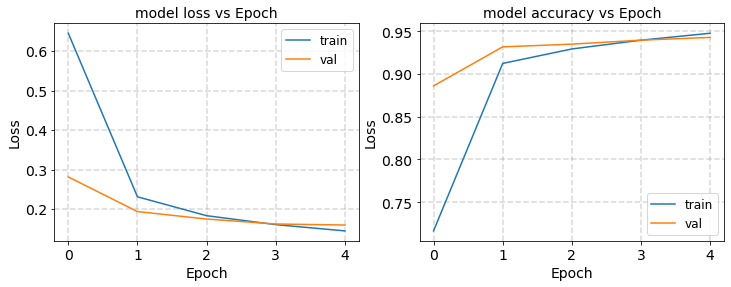

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_20 (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_21 (None, 32)                2082      
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 3s - loss: 0.8338 - accuracy: 0.7089 - val_loss: 0.5339 - val_accuracy: 0.8300
Epoch 2/10
1250/1250 - 2s - loss: 0.4828 - accuracy: 0.8415 - val_loss: 0.4569 - val_accuracy: 0.8433
Epoch 3/10
1250/1250 - 2s - loss: 0.43

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 6
round0 [9 3 8 2]
9
Epoch 1/5
1250/1250 - 3s - loss: 0.1069 - accuracy: 0.9685 - val_loss: 0.0704 - val_accuracy: 0.9794
Epoch 2/5
1250/1250 - 3s - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.0588 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0514 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 3s - loss: 0.0108 - accuracy: 0.9976 - val_loss: 0.0554 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 0.0062 - accuracy: 0.9989 - val_loss: 0.0532 - val_accuracy: 0.9874


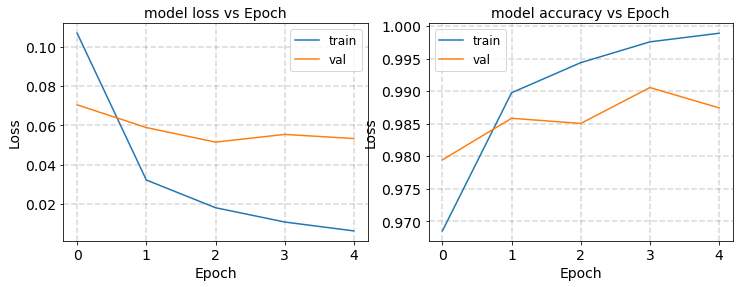

3
Epoch 1/5
1250/1250 - 3s - loss: 0.2458 - accuracy: 0.9318 - val_loss: 0.1392 - val_accuracy: 0.9572
Epoch 2/5
1250/1250 - 3s - loss: 0.0971 - accuracy: 0.9706 - val_loss: 0.0988 - val_accuracy: 0.9739
Epoch 3/5
1250/1250 - 3s - loss: 0.0666 - accuracy: 0.9800 - val_loss: 0.0835 - val_accuracy: 0.9794
Epoch 4/5
1250/1250 - 3s - loss: 0.0507 - accuracy: 0.9857 - val_loss: 0.0817 - val_accuracy: 0.9787
Epoch 5/5
1250/1250 - 3s - loss: 0.0391 - accuracy: 0.9892 - val_loss: 0.0870 - val_accuracy: 0.9763


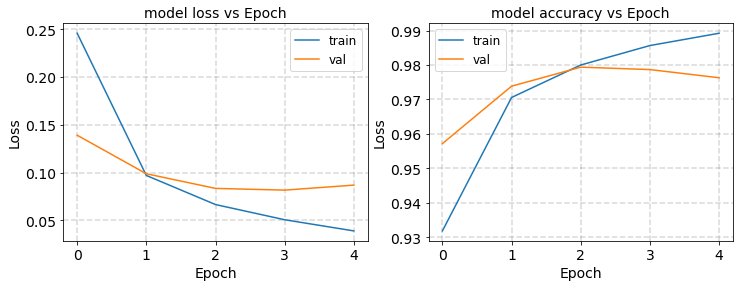

8
Epoch 1/5
1250/1250 - 3s - loss: 0.2563 - accuracy: 0.9112 - val_loss: 0.1460 - val_accuracy: 0.9567
Epoch 2/5
1250/1250 - 3s - loss: 0.1163 - accuracy: 0.9646 - val_loss: 0.1233 - val_accuracy: 0.9614
Epoch 3/5
1250/1250 - 3s - loss: 0.0880 - accuracy: 0.9734 - val_loss: 0.1091 - val_accuracy: 0.9668
Epoch 4/5
1250/1250 - 3s - loss: 0.0698 - accuracy: 0.9787 - val_loss: 0.1069 - val_accuracy: 0.9700
Epoch 5/5
1250/1250 - 3s - loss: 0.0583 - accuracy: 0.9834 - val_loss: 0.1059 - val_accuracy: 0.9684


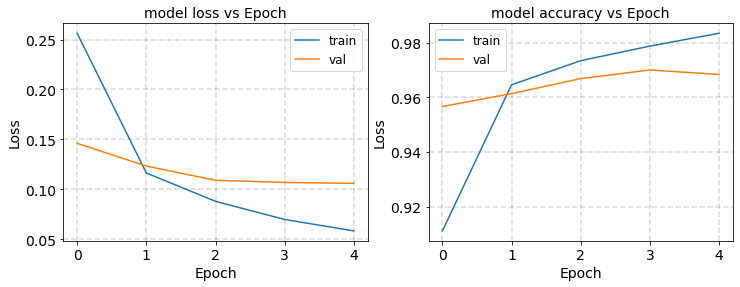

2
Epoch 1/5
1250/1250 - 3s - loss: 0.2581 - accuracy: 0.9165 - val_loss: 0.1114 - val_accuracy: 0.9607
Epoch 2/5
1250/1250 - 3s - loss: 0.1058 - accuracy: 0.9631 - val_loss: 0.0953 - val_accuracy: 0.9709
Epoch 3/5
1250/1250 - 3s - loss: 0.0908 - accuracy: 0.9684 - val_loss: 0.0926 - val_accuracy: 0.9717
Epoch 4/5
1250/1250 - 3s - loss: 0.0791 - accuracy: 0.9718 - val_loss: 0.0896 - val_accuracy: 0.9740
Epoch 5/5
1250/1250 - 3s - loss: 0.0648 - accuracy: 0.9775 - val_loss: 0.0833 - val_accuracy: 0.9772


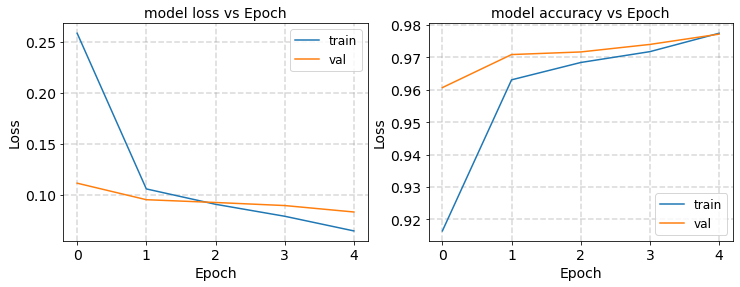

round1 [9 8 3 2]
9
Epoch 1/5
1250/1250 - 3s - loss: 0.1901 - accuracy: 0.9451 - val_loss: 0.0911 - val_accuracy: 0.9802
Epoch 2/5
1250/1250 - 3s - loss: 0.0343 - accuracy: 0.9906 - val_loss: 0.0731 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 3s - loss: 0.0250 - accuracy: 0.9930 - val_loss: 0.0681 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 0.0190 - accuracy: 0.9944 - val_loss: 0.0674 - val_accuracy: 0.9795
Epoch 5/5
1250/1250 - 3s - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.0658 - val_accuracy: 0.9826


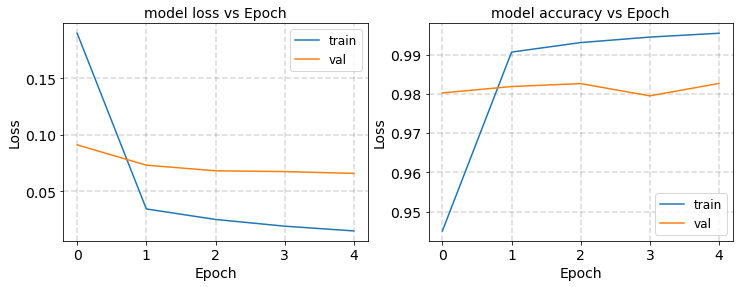

8
Epoch 1/5
1250/1250 - 4s - loss: 0.2143 - accuracy: 0.9394 - val_loss: 0.1100 - val_accuracy: 0.9676
Epoch 2/5
1250/1250 - 3s - loss: 0.0646 - accuracy: 0.9807 - val_loss: 0.1108 - val_accuracy: 0.9676
Epoch 3/5
1250/1250 - 4s - loss: 0.0535 - accuracy: 0.9844 - val_loss: 0.1096 - val_accuracy: 0.9676
Epoch 4/5
1250/1250 - 3s - loss: 0.0467 - accuracy: 0.9865 - val_loss: 0.1110 - val_accuracy: 0.9653
Epoch 5/5
1250/1250 - 3s - loss: 0.0420 - accuracy: 0.9875 - val_loss: 0.1165 - val_accuracy: 0.9645


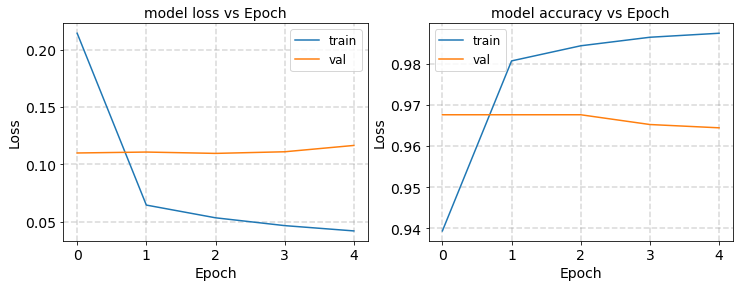

3
Epoch 1/5
1250/1250 - 3s - loss: 0.2921 - accuracy: 0.9179 - val_loss: 0.1686 - val_accuracy: 0.9502
Epoch 2/5
1250/1250 - 3s - loss: 0.1063 - accuracy: 0.9674 - val_loss: 0.1441 - val_accuracy: 0.9541
Epoch 3/5
1250/1250 - 3s - loss: 0.0860 - accuracy: 0.9748 - val_loss: 0.1294 - val_accuracy: 0.9580
Epoch 4/5
1250/1250 - 3s - loss: 0.0740 - accuracy: 0.9787 - val_loss: 0.1177 - val_accuracy: 0.9621
Epoch 5/5
1250/1250 - 3s - loss: 0.0645 - accuracy: 0.9822 - val_loss: 0.1180 - val_accuracy: 0.9596


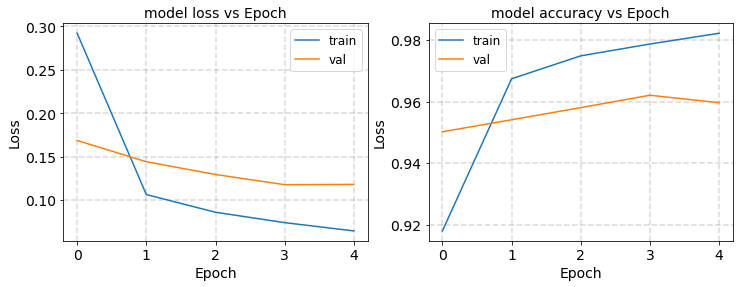

2
Epoch 1/5
1250/1250 - 3s - loss: 0.2914 - accuracy: 0.9056 - val_loss: 0.1295 - val_accuracy: 0.9590
Epoch 2/5
1250/1250 - 3s - loss: 0.1010 - accuracy: 0.9646 - val_loss: 0.0991 - val_accuracy: 0.9693
Epoch 3/5
1250/1250 - 3s - loss: 0.0781 - accuracy: 0.9733 - val_loss: 0.0898 - val_accuracy: 0.9724
Epoch 4/5
1250/1250 - 3s - loss: 0.0650 - accuracy: 0.9789 - val_loss: 0.0904 - val_accuracy: 0.9747
Epoch 5/5
1250/1250 - 3s - loss: 0.0551 - accuracy: 0.9825 - val_loss: 0.0865 - val_accuracy: 0.9747


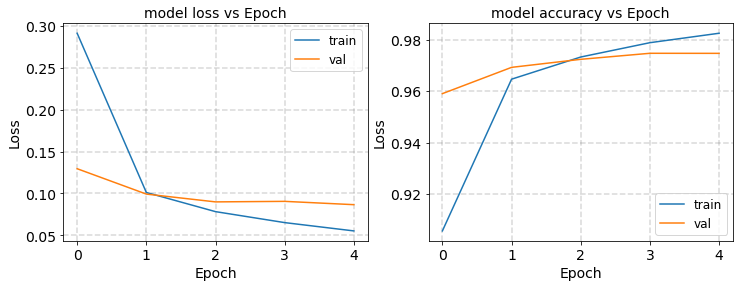

round2 [3 2 9 8]
3
Epoch 1/5
1250/1250 - 3s - loss: 0.2234 - accuracy: 0.9364 - val_loss: 0.1259 - val_accuracy: 0.9603
Epoch 2/5
1250/1250 - 3s - loss: 0.0862 - accuracy: 0.9747 - val_loss: 0.1136 - val_accuracy: 0.9643
Epoch 3/5
1250/1250 - 3s - loss: 0.0739 - accuracy: 0.9786 - val_loss: 0.1126 - val_accuracy: 0.9651
Epoch 4/5
1250/1250 - 3s - loss: 0.0653 - accuracy: 0.9809 - val_loss: 0.1058 - val_accuracy: 0.9651
Epoch 5/5
1250/1250 - 3s - loss: 0.0587 - accuracy: 0.9819 - val_loss: 0.1091 - val_accuracy: 0.9667


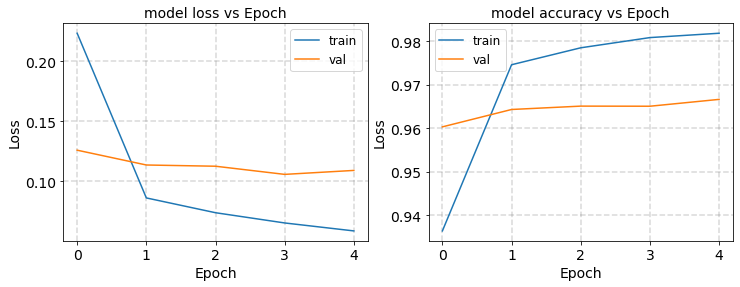

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1510 - accuracy: 0.9515 - val_loss: 0.0898 - val_accuracy: 0.9716
Epoch 2/5
1250/1250 - 2s - loss: 0.0655 - accuracy: 0.9786 - val_loss: 0.0854 - val_accuracy: 0.9723
Epoch 3/5
1250/1250 - 2s - loss: 0.0567 - accuracy: 0.9813 - val_loss: 0.0909 - val_accuracy: 0.9747
Epoch 4/5
1250/1250 - 2s - loss: 0.0503 - accuracy: 0.9833 - val_loss: 0.0938 - val_accuracy: 0.9739
Epoch 5/5
1250/1250 - 2s - loss: 0.0447 - accuracy: 0.9858 - val_loss: 0.0980 - val_accuracy: 0.9747


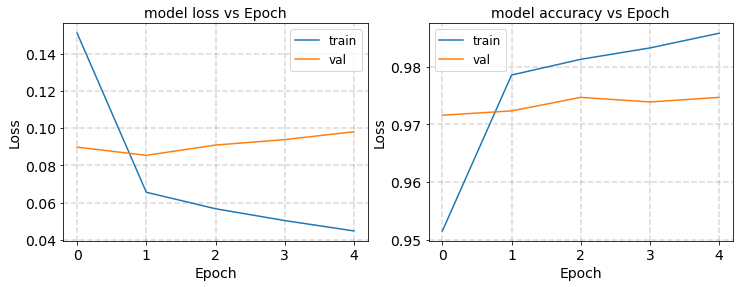

9
Epoch 1/5
1250/1250 - 2s - loss: 0.4667 - accuracy: 0.8435 - val_loss: 0.1652 - val_accuracy: 0.9400
Epoch 2/5
1250/1250 - 2s - loss: 0.1299 - accuracy: 0.9538 - val_loss: 0.1270 - val_accuracy: 0.9604
Epoch 3/5
1250/1250 - 2s - loss: 0.1015 - accuracy: 0.9638 - val_loss: 0.1126 - val_accuracy: 0.9636
Epoch 4/5
1250/1250 - 2s - loss: 0.0848 - accuracy: 0.9714 - val_loss: 0.1039 - val_accuracy: 0.9676
Epoch 5/5
1250/1250 - 3s - loss: 0.0718 - accuracy: 0.9765 - val_loss: 0.1002 - val_accuracy: 0.9692


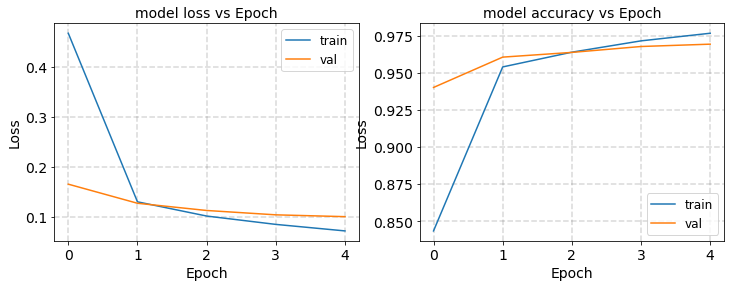

8
Epoch 1/5
1250/1250 - 2s - loss: 0.4487 - accuracy: 0.8274 - val_loss: 0.2241 - val_accuracy: 0.9156
Epoch 2/5
1250/1250 - 3s - loss: 0.1640 - accuracy: 0.9409 - val_loss: 0.1515 - val_accuracy: 0.9479
Epoch 3/5
1250/1250 - 2s - loss: 0.1122 - accuracy: 0.9606 - val_loss: 0.1338 - val_accuracy: 0.9566
Epoch 4/5
1250/1250 - 3s - loss: 0.0923 - accuracy: 0.9674 - val_loss: 0.1217 - val_accuracy: 0.9621
Epoch 5/5
1250/1250 - 3s - loss: 0.0811 - accuracy: 0.9715 - val_loss: 0.1177 - val_accuracy: 0.9676


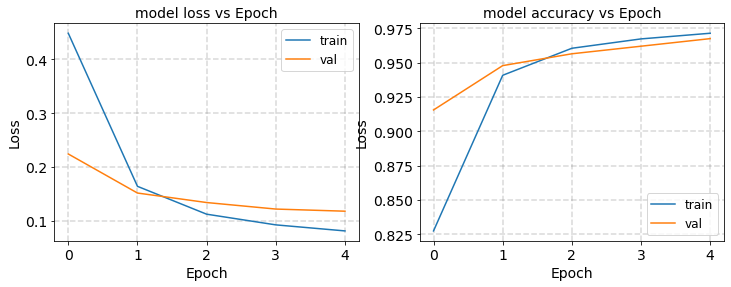

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_24 (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_25 (None, 32)                2082      
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 2s - loss: 0.6045 - accuracy: 0.8227 - val_loss: 0.3338 - val_accuracy: 0.9109
Epoch 2/10
1250/1250 - 1s - loss: 0.2677 - accuracy: 0.9215 - val_loss: 0.2813 - val_accuracy: 0.9148
Epoch 3/10
1250/1250 - 2s - loss: 0.22

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 7
round0 [9 3 8 2]
9
Epoch 1/5
1250/1250 - 3s - loss: 0.1144 - accuracy: 0.9592 - val_loss: 0.0810 - val_accuracy: 0.9730
Epoch 2/5
1250/1250 - 2s - loss: 0.0426 - accuracy: 0.9864 - val_loss: 0.0672 - val_accuracy: 0.9795
Epoch 3/5
1250/1250 - 2s - loss: 0.0272 - accuracy: 0.9906 - val_loss: 0.0592 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.0602 - val_accuracy: 0.9819
Epoch 5/5
1250/1250 - 3s - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0588 - val_accuracy: 0.9850


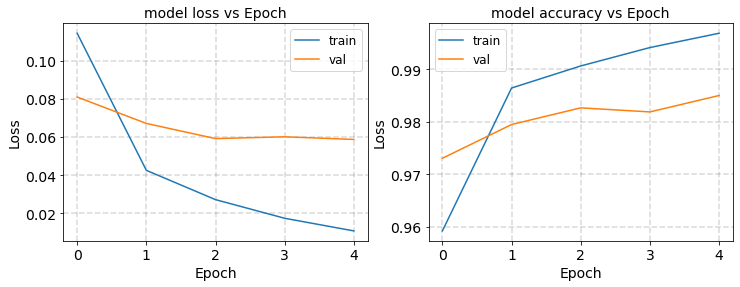

3
Epoch 1/5
1250/1250 - 5s - loss: 0.2155 - accuracy: 0.9409 - val_loss: 0.1032 - val_accuracy: 0.9684
Epoch 2/5
1250/1250 - 4s - loss: 0.0805 - accuracy: 0.9761 - val_loss: 0.0867 - val_accuracy: 0.9732
Epoch 3/5
1250/1250 - 4s - loss: 0.0621 - accuracy: 0.9824 - val_loss: 0.0767 - val_accuracy: 0.9803
Epoch 4/5
1250/1250 - 4s - loss: 0.0494 - accuracy: 0.9869 - val_loss: 0.0763 - val_accuracy: 0.9827
Epoch 5/5
1250/1250 - 4s - loss: 0.0398 - accuracy: 0.9891 - val_loss: 0.0745 - val_accuracy: 0.9819


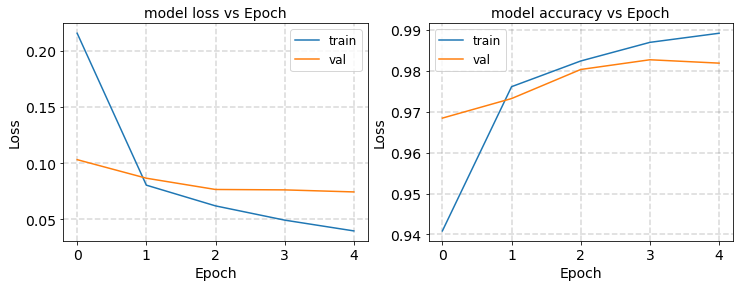

8
Epoch 1/5
1250/1250 - 4s - loss: 0.2295 - accuracy: 0.9272 - val_loss: 0.1104 - val_accuracy: 0.9613
Epoch 2/5
1250/1250 - 4s - loss: 0.0985 - accuracy: 0.9676 - val_loss: 0.0930 - val_accuracy: 0.9645
Epoch 3/5
1250/1250 - 3s - loss: 0.0768 - accuracy: 0.9762 - val_loss: 0.0843 - val_accuracy: 0.9685
Epoch 4/5
1250/1250 - 4s - loss: 0.0614 - accuracy: 0.9821 - val_loss: 0.0818 - val_accuracy: 0.9708
Epoch 5/5
1250/1250 - 4s - loss: 0.0496 - accuracy: 0.9856 - val_loss: 0.0831 - val_accuracy: 0.9700


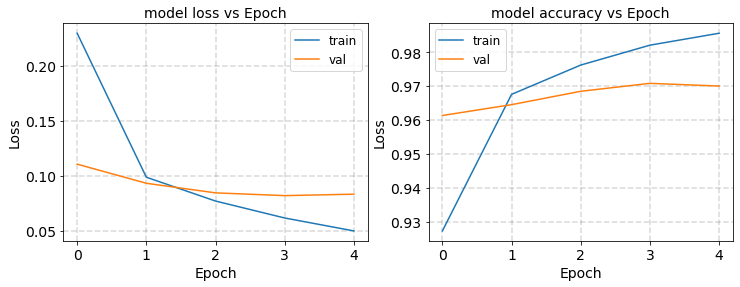

2
Epoch 1/5
1250/1250 - 4s - loss: 0.2242 - accuracy: 0.9349 - val_loss: 0.1004 - val_accuracy: 0.9708
Epoch 2/5
1250/1250 - 4s - loss: 0.0953 - accuracy: 0.9690 - val_loss: 0.0818 - val_accuracy: 0.9755
Epoch 3/5
1250/1250 - 4s - loss: 0.0787 - accuracy: 0.9759 - val_loss: 0.0768 - val_accuracy: 0.9795
Epoch 4/5
1250/1250 - 3s - loss: 0.0661 - accuracy: 0.9793 - val_loss: 0.0692 - val_accuracy: 0.9827
Epoch 5/5
1250/1250 - 4s - loss: 0.0557 - accuracy: 0.9831 - val_loss: 0.0661 - val_accuracy: 0.9827


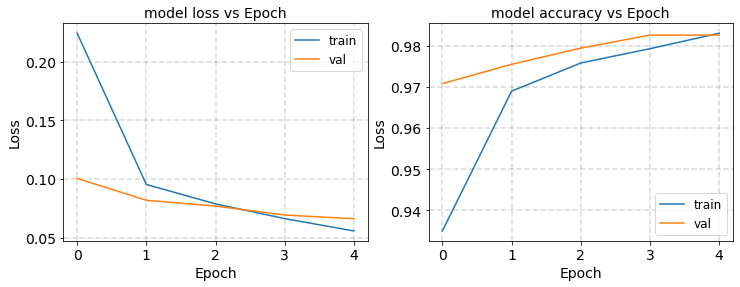

round1 [9 3 2 8]
9
Epoch 1/5
1250/1250 - 3s - loss: 0.2085 - accuracy: 0.9380 - val_loss: 0.1127 - val_accuracy: 0.9683
Epoch 2/5
1250/1250 - 4s - loss: 0.0551 - accuracy: 0.9834 - val_loss: 0.0865 - val_accuracy: 0.9707
Epoch 3/5
1250/1250 - 5s - loss: 0.0380 - accuracy: 0.9884 - val_loss: 0.0744 - val_accuracy: 0.9747
Epoch 4/5
1250/1250 - 4s - loss: 0.0268 - accuracy: 0.9919 - val_loss: 0.0690 - val_accuracy: 0.9779
Epoch 5/5
1250/1250 - 4s - loss: 0.0200 - accuracy: 0.9944 - val_loss: 0.0637 - val_accuracy: 0.9779


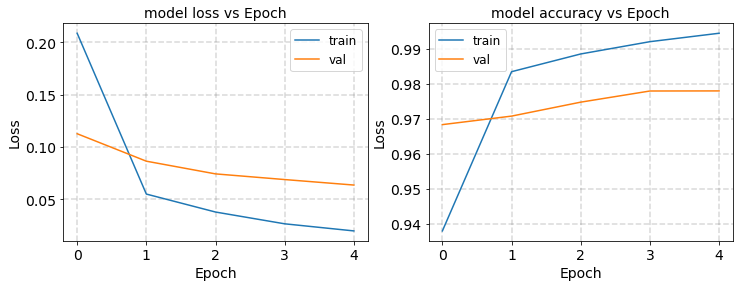

3
Epoch 1/5
1250/1250 - 4s - loss: 0.2573 - accuracy: 0.9212 - val_loss: 0.1301 - val_accuracy: 0.9604
Epoch 2/5
1250/1250 - 3s - loss: 0.0921 - accuracy: 0.9698 - val_loss: 0.1038 - val_accuracy: 0.9700
Epoch 3/5
1250/1250 - 3s - loss: 0.0715 - accuracy: 0.9770 - val_loss: 0.0962 - val_accuracy: 0.9740
Epoch 4/5
1250/1250 - 3s - loss: 0.0585 - accuracy: 0.9823 - val_loss: 0.0941 - val_accuracy: 0.9787
Epoch 5/5
1250/1250 - 3s - loss: 0.0498 - accuracy: 0.9847 - val_loss: 0.0931 - val_accuracy: 0.9779


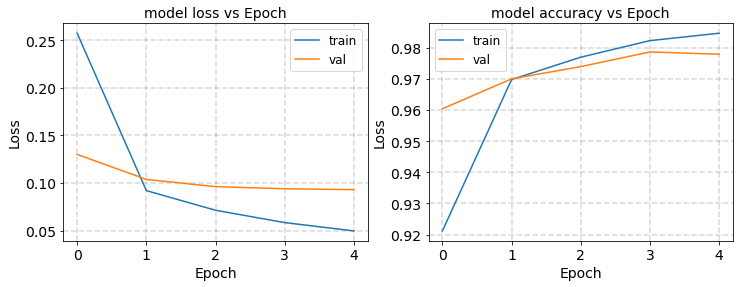

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1950 - accuracy: 0.9454 - val_loss: 0.1044 - val_accuracy: 0.9693
Epoch 2/5
1250/1250 - 3s - loss: 0.0763 - accuracy: 0.9758 - val_loss: 0.0949 - val_accuracy: 0.9732
Epoch 3/5
1250/1250 - 3s - loss: 0.0659 - accuracy: 0.9793 - val_loss: 0.0901 - val_accuracy: 0.9748
Epoch 4/5
1250/1250 - 4s - loss: 0.0589 - accuracy: 0.9812 - val_loss: 0.0870 - val_accuracy: 0.9771
Epoch 5/5
1250/1250 - 3s - loss: 0.0522 - accuracy: 0.9833 - val_loss: 0.0866 - val_accuracy: 0.9779


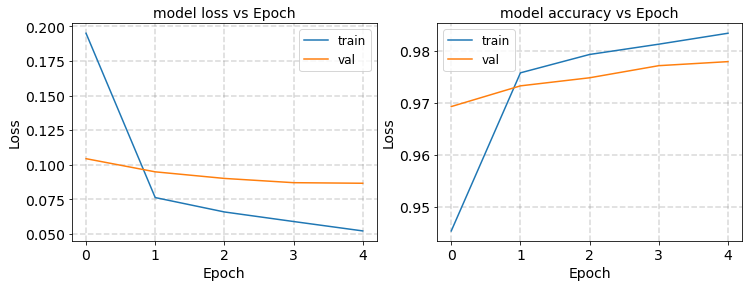

8
Epoch 1/5
1250/1250 - 3s - loss: 0.3547 - accuracy: 0.8697 - val_loss: 0.1955 - val_accuracy: 0.9321
Epoch 2/5
1250/1250 - 2s - loss: 0.1619 - accuracy: 0.9455 - val_loss: 0.1426 - val_accuracy: 0.9566
Epoch 3/5
1250/1250 - 3s - loss: 0.1175 - accuracy: 0.9643 - val_loss: 0.1217 - val_accuracy: 0.9636
Epoch 4/5
1250/1250 - 3s - loss: 0.0949 - accuracy: 0.9724 - val_loss: 0.1135 - val_accuracy: 0.9637
Epoch 5/5
1250/1250 - 3s - loss: 0.0802 - accuracy: 0.9771 - val_loss: 0.1099 - val_accuracy: 0.9644


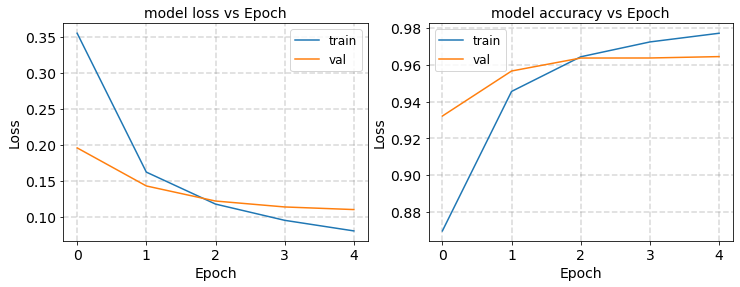

round2 [3 8 9 2]
3
Epoch 1/5
1250/1250 - 3s - loss: 0.2854 - accuracy: 0.9021 - val_loss: 0.1457 - val_accuracy: 0.9637
Epoch 2/5
1250/1250 - 3s - loss: 0.1022 - accuracy: 0.9672 - val_loss: 0.1300 - val_accuracy: 0.9621
Epoch 3/5
1250/1250 - 3s - loss: 0.0817 - accuracy: 0.9754 - val_loss: 0.1164 - val_accuracy: 0.9707
Epoch 4/5
1250/1250 - 2s - loss: 0.0673 - accuracy: 0.9813 - val_loss: 0.1047 - val_accuracy: 0.9755
Epoch 5/5
1250/1250 - 3s - loss: 0.0583 - accuracy: 0.9835 - val_loss: 0.1012 - val_accuracy: 0.9763


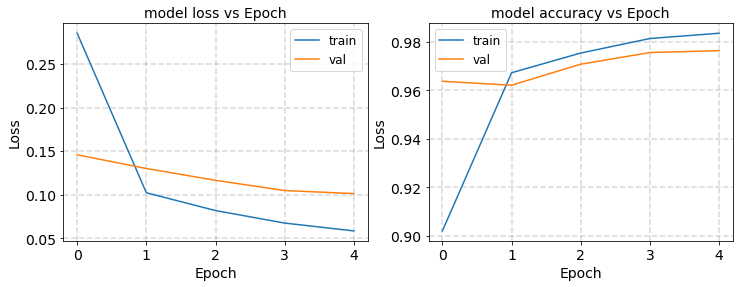

8
Epoch 1/5
1250/1250 - 3s - loss: 0.2104 - accuracy: 0.9358 - val_loss: 0.1214 - val_accuracy: 0.9614
Epoch 2/5
1250/1250 - 2s - loss: 0.0890 - accuracy: 0.9715 - val_loss: 0.1164 - val_accuracy: 0.9661
Epoch 3/5
1250/1250 - 2s - loss: 0.0764 - accuracy: 0.9756 - val_loss: 0.1107 - val_accuracy: 0.9653
Epoch 4/5
1250/1250 - 3s - loss: 0.0687 - accuracy: 0.9783 - val_loss: 0.1104 - val_accuracy: 0.9676
Epoch 5/5
1250/1250 - 2s - loss: 0.0627 - accuracy: 0.9800 - val_loss: 0.1123 - val_accuracy: 0.9660


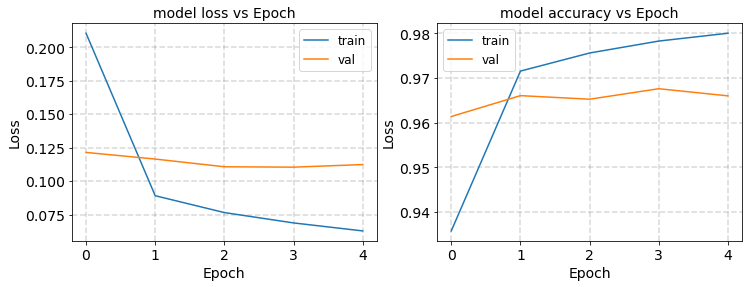

9
Epoch 1/5
1250/1250 - 3s - loss: 0.1892 - accuracy: 0.9417 - val_loss: 0.1288 - val_accuracy: 0.9629
Epoch 2/5
1250/1250 - 3s - loss: 0.0742 - accuracy: 0.9754 - val_loss: 0.1192 - val_accuracy: 0.9629
Epoch 3/5
1250/1250 - 2s - loss: 0.0642 - accuracy: 0.9787 - val_loss: 0.1102 - val_accuracy: 0.9669
Epoch 4/5
1250/1250 - 2s - loss: 0.0591 - accuracy: 0.9798 - val_loss: 0.1058 - val_accuracy: 0.9677
Epoch 5/5
1250/1250 - 2s - loss: 0.0539 - accuracy: 0.9816 - val_loss: 0.1021 - val_accuracy: 0.9700


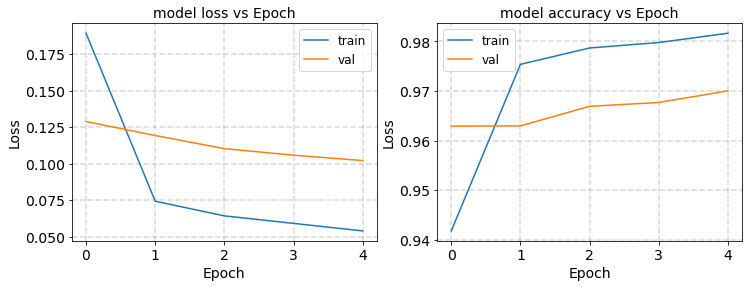

2
Epoch 1/5
1250/1250 - 3s - loss: 0.3312 - accuracy: 0.9081 - val_loss: 0.0912 - val_accuracy: 0.9748
Epoch 2/5
1250/1250 - 2s - loss: 0.0768 - accuracy: 0.9732 - val_loss: 0.0828 - val_accuracy: 0.9764
Epoch 3/5
1250/1250 - 3s - loss: 0.0642 - accuracy: 0.9783 - val_loss: 0.0810 - val_accuracy: 0.9764
Epoch 4/5
1250/1250 - 2s - loss: 0.0547 - accuracy: 0.9819 - val_loss: 0.0787 - val_accuracy: 0.9772
Epoch 5/5
1250/1250 - 3s - loss: 0.0475 - accuracy: 0.9852 - val_loss: 0.0715 - val_accuracy: 0.9811


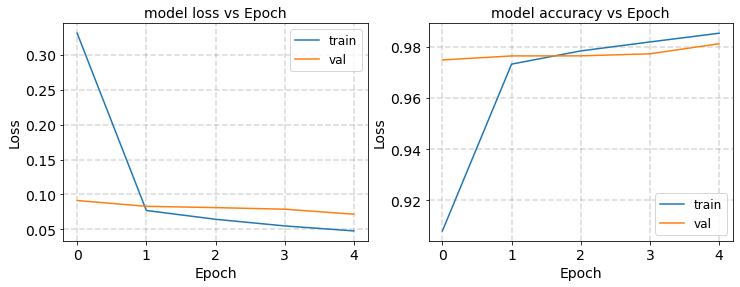

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_28 (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_29 (None, 32)                2082      
_________________________________________________________________
dense_31 (Dense)             (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 2s - loss: 0.6504 - accuracy: 0.7656 - val_loss: 0.4203 - val_accuracy: 0.8466
Epoch 2/10
1250/1250 - 2s - loss: 0.3370 - accuracy: 0.8853 - val_loss: 0.3567 - val_accuracy: 0.8741
Epoch 3/10
1250/1250 - 2s - loss: 0.29

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 8
round0 [2 3 8 9]
2
Epoch 1/5
1250/1250 - 4s - loss: 0.1402 - accuracy: 0.9500 - val_loss: 0.0820 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 3s - loss: 0.0586 - accuracy: 0.9821 - val_loss: 0.0624 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 4s - loss: 0.0393 - accuracy: 0.9886 - val_loss: 0.0588 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 4s - loss: 0.0266 - accuracy: 0.9928 - val_loss: 0.0531 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 4s - loss: 0.0183 - accuracy: 0.9954 - val_loss: 0.0524 - val_accuracy: 0.9858


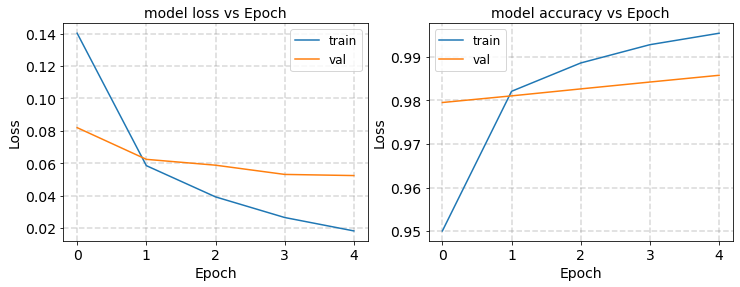

3
Epoch 1/5
1250/1250 - 4s - loss: 0.2606 - accuracy: 0.9209 - val_loss: 0.1224 - val_accuracy: 0.9628
Epoch 2/5
1250/1250 - 4s - loss: 0.0974 - accuracy: 0.9703 - val_loss: 0.0919 - val_accuracy: 0.9700
Epoch 3/5
1250/1250 - 3s - loss: 0.0703 - accuracy: 0.9785 - val_loss: 0.0826 - val_accuracy: 0.9747
Epoch 4/5
1250/1250 - 3s - loss: 0.0558 - accuracy: 0.9840 - val_loss: 0.0751 - val_accuracy: 0.9755
Epoch 5/5
1250/1250 - 4s - loss: 0.0451 - accuracy: 0.9867 - val_loss: 0.0827 - val_accuracy: 0.9787


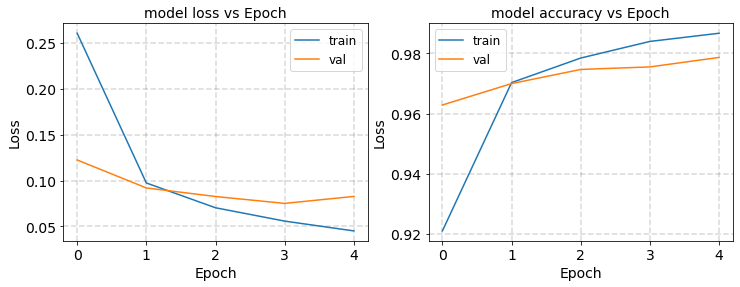

8
Epoch 1/5
1250/1250 - 4s - loss: 0.2323 - accuracy: 0.9237 - val_loss: 0.1124 - val_accuracy: 0.9653
Epoch 2/5
1250/1250 - 4s - loss: 0.1041 - accuracy: 0.9654 - val_loss: 0.1013 - val_accuracy: 0.9739
Epoch 3/5
1250/1250 - 3s - loss: 0.0864 - accuracy: 0.9725 - val_loss: 0.0937 - val_accuracy: 0.9724
Epoch 4/5
1250/1250 - 3s - loss: 0.0718 - accuracy: 0.9775 - val_loss: 0.0916 - val_accuracy: 0.9748
Epoch 5/5
1250/1250 - 3s - loss: 0.0624 - accuracy: 0.9804 - val_loss: 0.0895 - val_accuracy: 0.9740


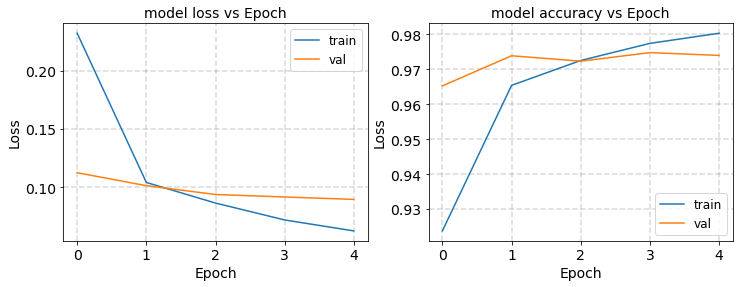

9
Epoch 1/5
1250/1250 - 4s - loss: 0.1972 - accuracy: 0.9398 - val_loss: 0.1003 - val_accuracy: 0.9715
Epoch 2/5
1250/1250 - 4s - loss: 0.0758 - accuracy: 0.9754 - val_loss: 0.0858 - val_accuracy: 0.9786
Epoch 3/5
1250/1250 - 4s - loss: 0.0598 - accuracy: 0.9808 - val_loss: 0.0834 - val_accuracy: 0.9803
Epoch 4/5
1250/1250 - 4s - loss: 0.0495 - accuracy: 0.9847 - val_loss: 0.0800 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 3s - loss: 0.0419 - accuracy: 0.9875 - val_loss: 0.0820 - val_accuracy: 0.9811


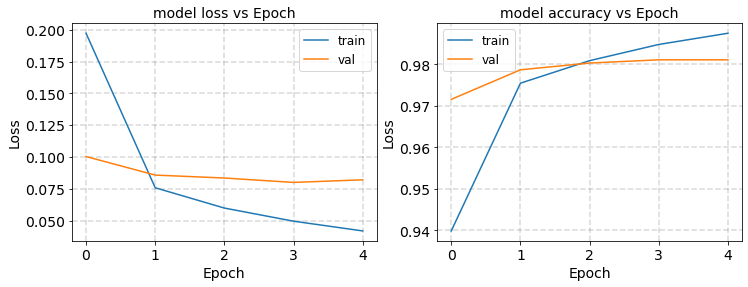

round1 [8 3 2 9]
8
Epoch 1/5
1250/1250 - 3s - loss: 0.2758 - accuracy: 0.9038 - val_loss: 0.1664 - val_accuracy: 0.9496
Epoch 2/5
1250/1250 - 4s - loss: 0.1257 - accuracy: 0.9609 - val_loss: 0.1325 - val_accuracy: 0.9592
Epoch 3/5
1250/1250 - 4s - loss: 0.0939 - accuracy: 0.9718 - val_loss: 0.1209 - val_accuracy: 0.9615
Epoch 4/5
1250/1250 - 4s - loss: 0.0759 - accuracy: 0.9771 - val_loss: 0.1123 - val_accuracy: 0.9678
Epoch 5/5
1250/1250 - 4s - loss: 0.0648 - accuracy: 0.9803 - val_loss: 0.1116 - val_accuracy: 0.9670


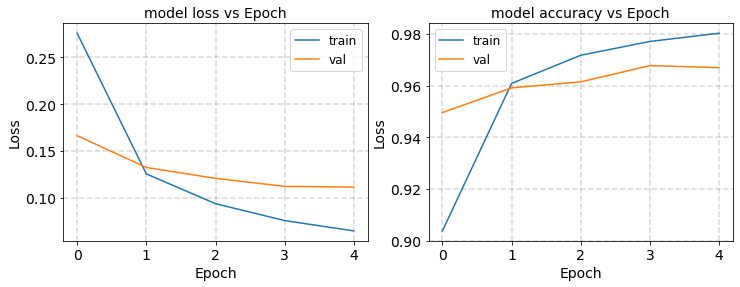

3
Epoch 1/5
1250/1250 - 3s - loss: 0.2800 - accuracy: 0.9136 - val_loss: 0.1544 - val_accuracy: 0.9494
Epoch 2/5
1250/1250 - 4s - loss: 0.1163 - accuracy: 0.9632 - val_loss: 0.1385 - val_accuracy: 0.9541
Epoch 3/5
1250/1250 - 5s - loss: 0.0953 - accuracy: 0.9708 - val_loss: 0.1293 - val_accuracy: 0.9565
Epoch 4/5
1250/1250 - 5s - loss: 0.0821 - accuracy: 0.9747 - val_loss: 0.1217 - val_accuracy: 0.9581
Epoch 5/5
1250/1250 - 4s - loss: 0.0714 - accuracy: 0.9777 - val_loss: 0.1094 - val_accuracy: 0.9645


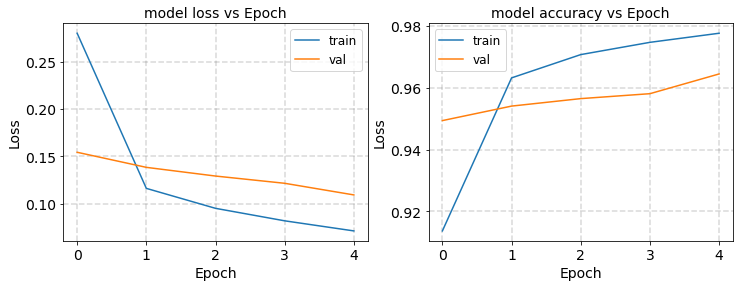

2
Epoch 1/5
1250/1250 - 3s - loss: 0.2722 - accuracy: 0.9164 - val_loss: 0.1225 - val_accuracy: 0.9692
Epoch 2/5
1250/1250 - 2s - loss: 0.0972 - accuracy: 0.9668 - val_loss: 0.1067 - val_accuracy: 0.9739
Epoch 3/5
1250/1250 - 3s - loss: 0.0755 - accuracy: 0.9758 - val_loss: 0.0938 - val_accuracy: 0.9779
Epoch 4/5
1250/1250 - 3s - loss: 0.0642 - accuracy: 0.9807 - val_loss: 0.0878 - val_accuracy: 0.9794
Epoch 5/5
1250/1250 - 3s - loss: 0.0555 - accuracy: 0.9840 - val_loss: 0.0832 - val_accuracy: 0.9818


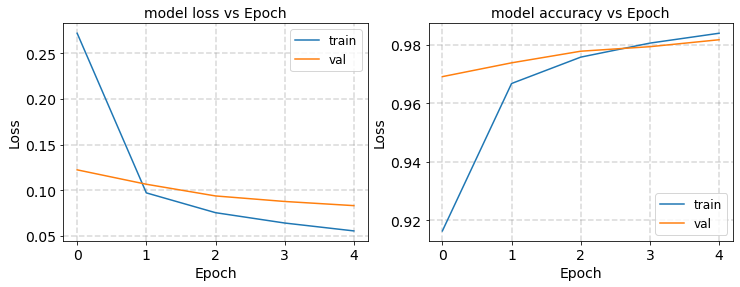

9
Epoch 1/5
1250/1250 - 3s - loss: 0.3143 - accuracy: 0.9011 - val_loss: 0.1311 - val_accuracy: 0.9495
Epoch 2/5
1250/1250 - 3s - loss: 0.0897 - accuracy: 0.9700 - val_loss: 0.1152 - val_accuracy: 0.9612
Epoch 3/5
1250/1250 - 2s - loss: 0.0720 - accuracy: 0.9768 - val_loss: 0.1070 - val_accuracy: 0.9651
Epoch 4/5
1250/1250 - 3s - loss: 0.0618 - accuracy: 0.9803 - val_loss: 0.0997 - val_accuracy: 0.9676
Epoch 5/5
1250/1250 - 3s - loss: 0.0541 - accuracy: 0.9822 - val_loss: 0.0969 - val_accuracy: 0.9715


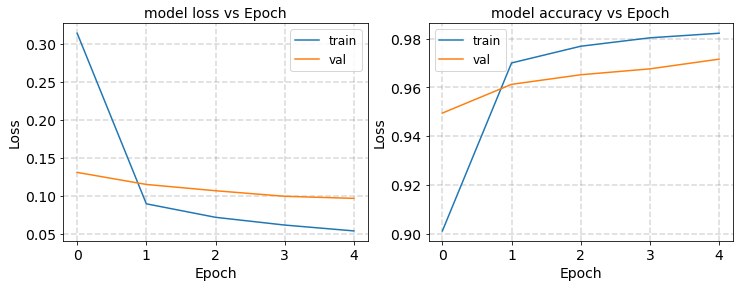

round2 [9 3 2 8]
9
Epoch 1/5
1250/1250 - 3s - loss: 0.0479 - accuracy: 0.9847 - val_loss: 0.0940 - val_accuracy: 0.9731
Epoch 2/5
1250/1250 - 3s - loss: 0.0428 - accuracy: 0.9860 - val_loss: 0.0916 - val_accuracy: 0.9763
Epoch 3/5
1250/1250 - 3s - loss: 0.0382 - accuracy: 0.9870 - val_loss: 0.0923 - val_accuracy: 0.9755
Epoch 4/5
1250/1250 - 3s - loss: 0.0345 - accuracy: 0.9881 - val_loss: 0.0912 - val_accuracy: 0.9763
Epoch 5/5
1250/1250 - 2s - loss: 0.0312 - accuracy: 0.9896 - val_loss: 0.0910 - val_accuracy: 0.9771


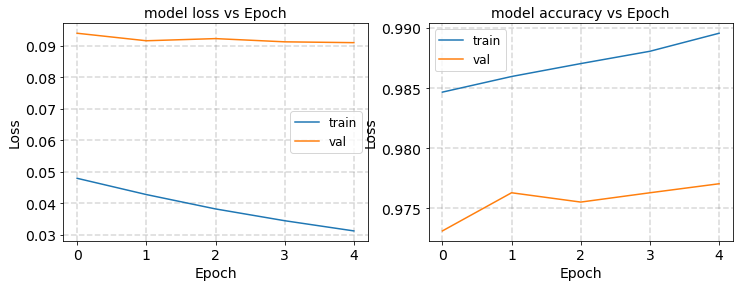

3
Epoch 1/5
1250/1250 - 3s - loss: 0.4297 - accuracy: 0.8848 - val_loss: 0.1495 - val_accuracy: 0.9550
Epoch 2/5
1250/1250 - 3s - loss: 0.1198 - accuracy: 0.9622 - val_loss: 0.1230 - val_accuracy: 0.9606
Epoch 3/5
1250/1250 - 3s - loss: 0.0952 - accuracy: 0.9701 - val_loss: 0.1134 - val_accuracy: 0.9668
Epoch 4/5
1250/1250 - 3s - loss: 0.0811 - accuracy: 0.9743 - val_loss: 0.1061 - val_accuracy: 0.9668
Epoch 5/5
1250/1250 - 2s - loss: 0.0711 - accuracy: 0.9769 - val_loss: 0.1031 - val_accuracy: 0.9692


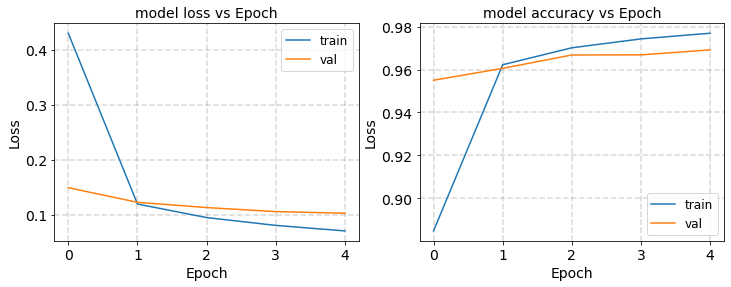

2
Epoch 1/5
1250/1250 - 3s - loss: 0.2439 - accuracy: 0.9242 - val_loss: 0.1288 - val_accuracy: 0.9646
Epoch 2/5
1250/1250 - 3s - loss: 0.0935 - accuracy: 0.9689 - val_loss: 0.1116 - val_accuracy: 0.9732
Epoch 3/5
1250/1250 - 3s - loss: 0.0759 - accuracy: 0.9748 - val_loss: 0.1006 - val_accuracy: 0.9733
Epoch 4/5
1250/1250 - 3s - loss: 0.0648 - accuracy: 0.9788 - val_loss: 0.0960 - val_accuracy: 0.9772
Epoch 5/5
1250/1250 - 3s - loss: 0.0572 - accuracy: 0.9818 - val_loss: 0.0933 - val_accuracy: 0.9787


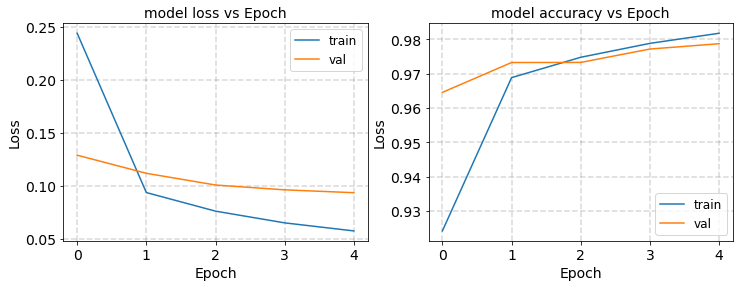

8
Epoch 1/5
1250/1250 - 3s - loss: 0.3759 - accuracy: 0.8721 - val_loss: 0.1767 - val_accuracy: 0.9297
Epoch 2/5
1250/1250 - 3s - loss: 0.1412 - accuracy: 0.9470 - val_loss: 0.1437 - val_accuracy: 0.9510
Epoch 3/5
1250/1250 - 3s - loss: 0.1086 - accuracy: 0.9606 - val_loss: 0.1322 - val_accuracy: 0.9517
Epoch 4/5
1250/1250 - 3s - loss: 0.0912 - accuracy: 0.9679 - val_loss: 0.1281 - val_accuracy: 0.9557
Epoch 5/5
1250/1250 - 3s - loss: 0.0796 - accuracy: 0.9736 - val_loss: 0.1231 - val_accuracy: 0.9572


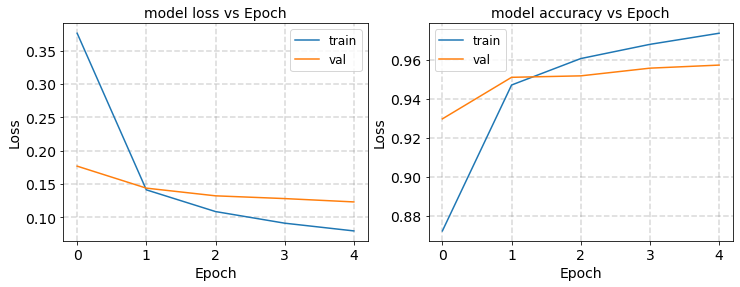

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_32 (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_33 (None, 32)                2082      
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 2s - loss: 0.5021 - accuracy: 0.8353 - val_loss: 0.3259 - val_accuracy: 0.8974
Epoch 2/10
1250/1250 - 2s - loss: 0.2533 - accuracy: 0.9236 - val_loss: 0.2862 - val_accuracy: 0.9061
Epoch 3/10
1250/1250 - 2s - loss: 0.22

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 9
round0 [3 8 2 9]
3
Epoch 1/5
1250/1250 - 4s - loss: 0.1775 - accuracy: 0.9337 - val_loss: 0.1044 - val_accuracy: 0.9660
Epoch 2/5
1250/1250 - 3s - loss: 0.0753 - accuracy: 0.9776 - val_loss: 0.0779 - val_accuracy: 0.9754
Epoch 3/5
1250/1250 - 3s - loss: 0.0471 - accuracy: 0.9869 - val_loss: 0.0648 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 3s - loss: 0.0318 - accuracy: 0.9925 - val_loss: 0.0601 - val_accuracy: 0.9802
Epoch 5/5
1250/1250 - 3s - loss: 0.0218 - accuracy: 0.9954 - val_loss: 0.0569 - val_accuracy: 0.9833


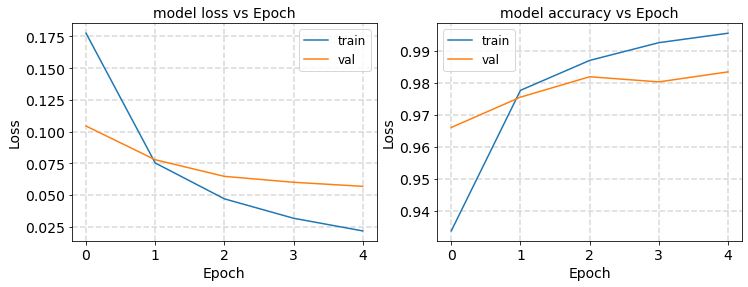

8
Epoch 1/5
1250/1250 - 3s - loss: 0.2251 - accuracy: 0.9265 - val_loss: 0.1306 - val_accuracy: 0.9568
Epoch 2/5
1250/1250 - 3s - loss: 0.1203 - accuracy: 0.9572 - val_loss: 0.1080 - val_accuracy: 0.9654
Epoch 3/5
1250/1250 - 3s - loss: 0.0939 - accuracy: 0.9687 - val_loss: 0.0974 - val_accuracy: 0.9701
Epoch 4/5
1250/1250 - 3s - loss: 0.0750 - accuracy: 0.9764 - val_loss: 0.0878 - val_accuracy: 0.9725
Epoch 5/5
1250/1250 - 3s - loss: 0.0579 - accuracy: 0.9810 - val_loss: 0.0815 - val_accuracy: 0.9764


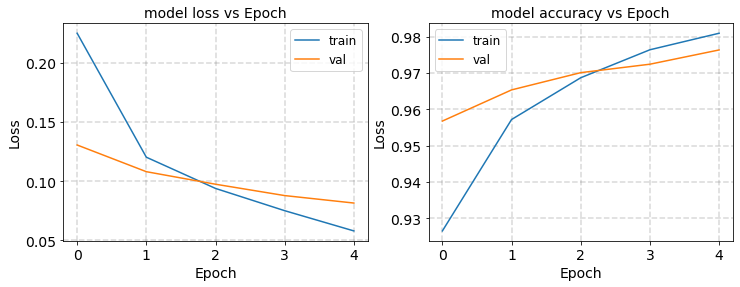

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1840 - accuracy: 0.9477 - val_loss: 0.0784 - val_accuracy: 0.9787
Epoch 2/5
1250/1250 - 3s - loss: 0.0585 - accuracy: 0.9815 - val_loss: 0.0644 - val_accuracy: 0.9779
Epoch 3/5
1250/1250 - 3s - loss: 0.0432 - accuracy: 0.9870 - val_loss: 0.0588 - val_accuracy: 0.9819
Epoch 4/5
1250/1250 - 3s - loss: 0.0331 - accuracy: 0.9900 - val_loss: 0.0517 - val_accuracy: 0.9851
Epoch 5/5
1250/1250 - 3s - loss: 0.0254 - accuracy: 0.9926 - val_loss: 0.0517 - val_accuracy: 0.9843


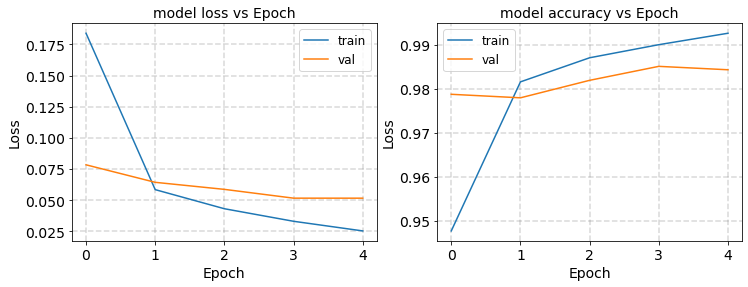

9
Epoch 1/5
1250/1250 - 3s - loss: 0.3173 - accuracy: 0.8907 - val_loss: 0.1703 - val_accuracy: 0.9613
Epoch 2/5
1250/1250 - 3s - loss: 0.1182 - accuracy: 0.9719 - val_loss: 0.1255 - val_accuracy: 0.9675
Epoch 3/5
1250/1250 - 3s - loss: 0.0828 - accuracy: 0.9790 - val_loss: 0.1064 - val_accuracy: 0.9715
Epoch 4/5
1250/1250 - 3s - loss: 0.0640 - accuracy: 0.9838 - val_loss: 0.0995 - val_accuracy: 0.9707
Epoch 5/5
1250/1250 - 3s - loss: 0.0532 - accuracy: 0.9854 - val_loss: 0.0972 - val_accuracy: 0.9771


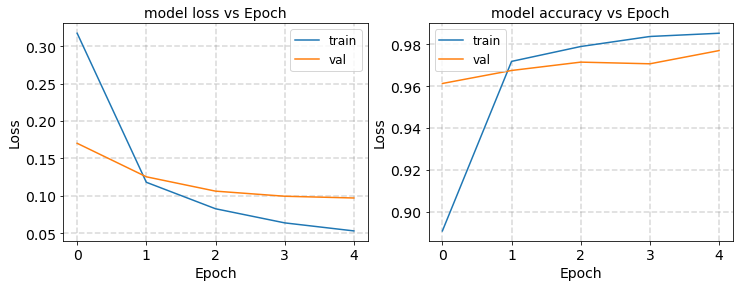

round1 [3 8 9 2]
3
Epoch 1/5
1250/1250 - 3s - loss: 0.3170 - accuracy: 0.8949 - val_loss: 0.1072 - val_accuracy: 0.9692
Epoch 2/5
1250/1250 - 4s - loss: 0.0800 - accuracy: 0.9735 - val_loss: 0.0956 - val_accuracy: 0.9707
Epoch 3/5
1250/1250 - 3s - loss: 0.0619 - accuracy: 0.9802 - val_loss: 0.0895 - val_accuracy: 0.9747
Epoch 4/5
1250/1250 - 4s - loss: 0.0506 - accuracy: 0.9844 - val_loss: 0.0940 - val_accuracy: 0.9731
Epoch 5/5
1250/1250 - 3s - loss: 0.0424 - accuracy: 0.9879 - val_loss: 0.0937 - val_accuracy: 0.9755


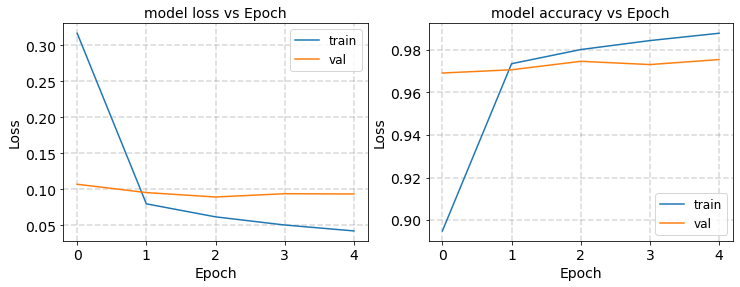

8
Epoch 1/5
1250/1250 - 4s - loss: 0.3148 - accuracy: 0.8852 - val_loss: 0.1484 - val_accuracy: 0.9551
Epoch 2/5
1250/1250 - 4s - loss: 0.1391 - accuracy: 0.9566 - val_loss: 0.1169 - val_accuracy: 0.9590
Epoch 3/5
1250/1250 - 4s - loss: 0.1110 - accuracy: 0.9652 - val_loss: 0.1013 - val_accuracy: 0.9708
Epoch 4/5
1250/1250 - 4s - loss: 0.0926 - accuracy: 0.9700 - val_loss: 0.0950 - val_accuracy: 0.9732
Epoch 5/5
1250/1250 - 3s - loss: 0.0815 - accuracy: 0.9736 - val_loss: 0.0914 - val_accuracy: 0.9724


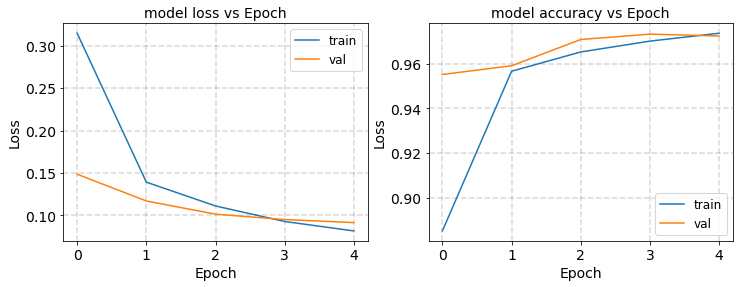

9
Epoch 1/5
1250/1250 - 4s - loss: 0.1855 - accuracy: 0.9393 - val_loss: 0.1235 - val_accuracy: 0.9693
Epoch 2/5
1250/1250 - 5s - loss: 0.0671 - accuracy: 0.9774 - val_loss: 0.1101 - val_accuracy: 0.9708
Epoch 3/5
1250/1250 - 4s - loss: 0.0556 - accuracy: 0.9806 - val_loss: 0.1058 - val_accuracy: 0.9748
Epoch 4/5
1250/1250 - 4s - loss: 0.0462 - accuracy: 0.9831 - val_loss: 0.0996 - val_accuracy: 0.9764
Epoch 5/5
1250/1250 - 4s - loss: 0.0392 - accuracy: 0.9864 - val_loss: 0.1020 - val_accuracy: 0.9772


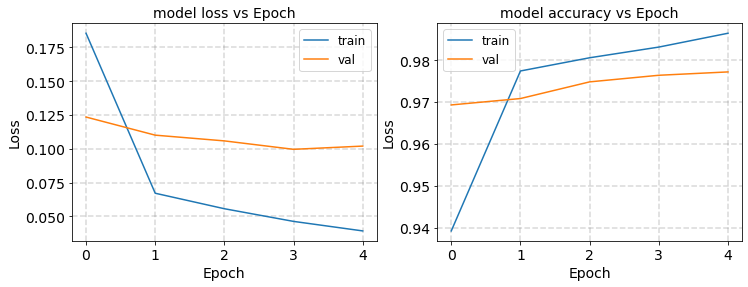

2
Epoch 1/5
1250/1250 - 4s - loss: 0.4963 - accuracy: 0.8586 - val_loss: 0.1430 - val_accuracy: 0.9542
Epoch 2/5
1250/1250 - 4s - loss: 0.1191 - accuracy: 0.9573 - val_loss: 0.1098 - val_accuracy: 0.9629
Epoch 3/5
1250/1250 - 4s - loss: 0.0883 - accuracy: 0.9698 - val_loss: 0.1012 - val_accuracy: 0.9700
Epoch 4/5
1250/1250 - 4s - loss: 0.0708 - accuracy: 0.9771 - val_loss: 0.0844 - val_accuracy: 0.9764
Epoch 5/5
1250/1250 - 4s - loss: 0.0566 - accuracy: 0.9827 - val_loss: 0.0815 - val_accuracy: 0.9819


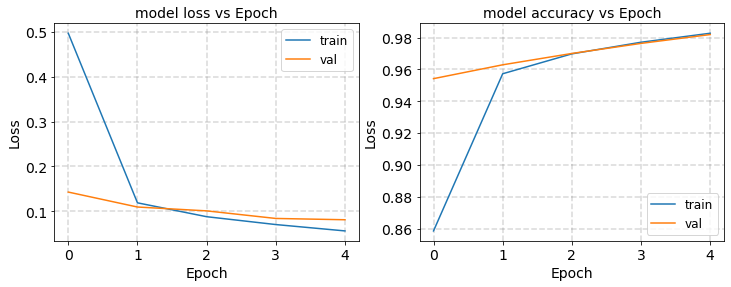

round2 [8 3 9 2]
8
Epoch 1/5
1250/1250 - 4s - loss: 0.3800 - accuracy: 0.8578 - val_loss: 0.1609 - val_accuracy: 0.9487
Epoch 2/5
1250/1250 - 4s - loss: 0.1259 - accuracy: 0.9581 - val_loss: 0.1243 - val_accuracy: 0.9621
Epoch 3/5
1250/1250 - 4s - loss: 0.1013 - accuracy: 0.9670 - val_loss: 0.1134 - val_accuracy: 0.9637
Epoch 4/5
1250/1250 - 4s - loss: 0.0899 - accuracy: 0.9702 - val_loss: 0.1077 - val_accuracy: 0.9669
Epoch 5/5
1250/1250 - 4s - loss: 0.0828 - accuracy: 0.9719 - val_loss: 0.1063 - val_accuracy: 0.9692


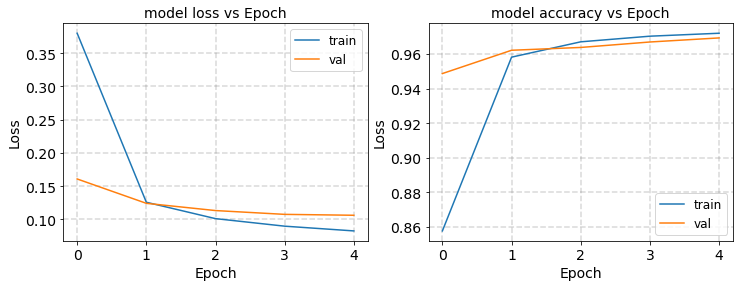

3
Epoch 1/5
1250/1250 - 3s - loss: 0.3112 - accuracy: 0.8970 - val_loss: 0.1685 - val_accuracy: 0.9487
Epoch 2/5
1250/1250 - 3s - loss: 0.1354 - accuracy: 0.9550 - val_loss: 0.1500 - val_accuracy: 0.9534
Epoch 3/5
1250/1250 - 4s - loss: 0.1192 - accuracy: 0.9604 - val_loss: 0.1365 - val_accuracy: 0.9566
Epoch 4/5
1250/1250 - 4s - loss: 0.1012 - accuracy: 0.9669 - val_loss: 0.1312 - val_accuracy: 0.9581
Epoch 5/5
1250/1250 - 4s - loss: 0.0906 - accuracy: 0.9711 - val_loss: 0.1289 - val_accuracy: 0.9605


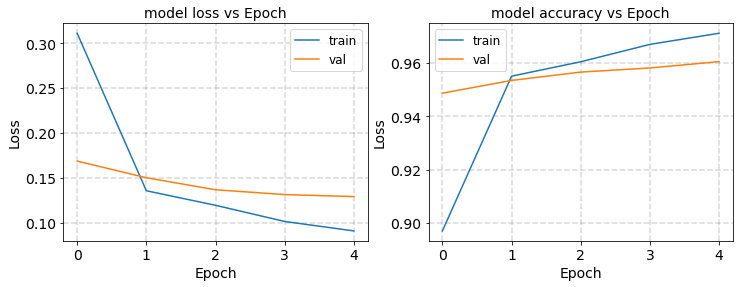

9
Epoch 1/5
1250/1250 - 4s - loss: 0.2384 - accuracy: 0.9222 - val_loss: 0.1049 - val_accuracy: 0.9651
Epoch 2/5
1250/1250 - 3s - loss: 0.0739 - accuracy: 0.9761 - val_loss: 0.0927 - val_accuracy: 0.9738
Epoch 3/5
1250/1250 - 4s - loss: 0.0582 - accuracy: 0.9825 - val_loss: 0.0873 - val_accuracy: 0.9739
Epoch 4/5
1250/1250 - 3s - loss: 0.0485 - accuracy: 0.9858 - val_loss: 0.0845 - val_accuracy: 0.9762
Epoch 5/5
1250/1250 - 4s - loss: 0.0413 - accuracy: 0.9876 - val_loss: 0.0864 - val_accuracy: 0.9786


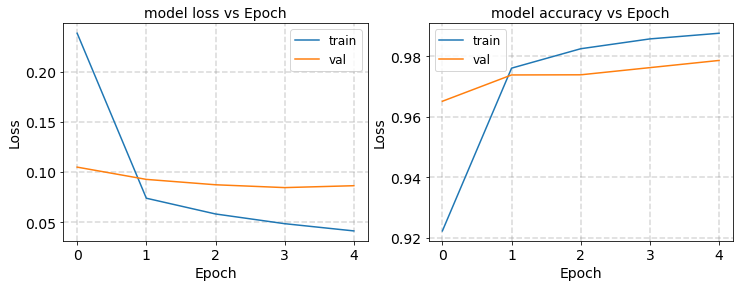

2
Epoch 1/5
1250/1250 - 4s - loss: 0.3124 - accuracy: 0.9050 - val_loss: 0.1111 - val_accuracy: 0.9669
Epoch 2/5
1250/1250 - 4s - loss: 0.0855 - accuracy: 0.9702 - val_loss: 0.0908 - val_accuracy: 0.9701
Epoch 3/5
1250/1250 - 3s - loss: 0.0657 - accuracy: 0.9775 - val_loss: 0.0832 - val_accuracy: 0.9724
Epoch 4/5
1250/1250 - 3s - loss: 0.0527 - accuracy: 0.9830 - val_loss: 0.0752 - val_accuracy: 0.9739
Epoch 5/5
1250/1250 - 4s - loss: 0.0431 - accuracy: 0.9869 - val_loss: 0.0729 - val_accuracy: 0.9771


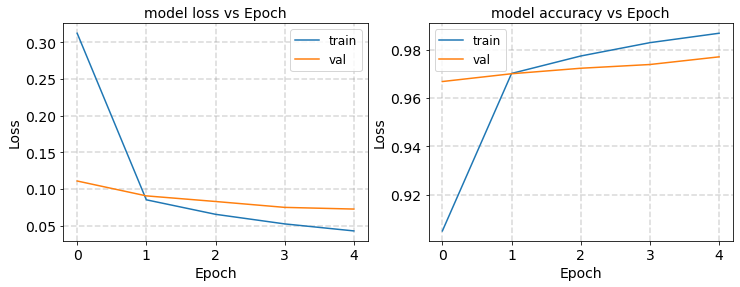

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_36 (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_37 (None, 32)                2082      
_________________________________________________________________
dense_39 (Dense)             (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 3s - loss: 0.8011 - accuracy: 0.7082 - val_loss: 0.4826 - val_accuracy: 0.8532
Epoch 2/10
1250/1250 - 2s - loss: 0.4100 - accuracy: 0.8702 - val_loss: 0.3879 - val_accuracy: 0.8768
Epoch 3/10
1250/1250 - 3s - loss: 0.34

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

CPU times: user 40min 34s, sys: 4min 4s, total: 44min 39s
Wall time: 44min 42s


In [4]:
%%time
series = [2,3,8,9]
num_runs = 10
name = '2389_seq_prune_08_2_32_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    
    
    model, history = nc.make_train_sequential_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=2,
                                  num_hidden_nodes=32,
                                  num_output_nodes=4,
                                  pruning=0.8,
                                  epochs_per_numeral=5,
                                  num_cycles = 3, 
                                  verbose=2,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [5]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2389_seq_prune_08_2_32_run0  1.77577          1.6777       0.231081   
2389_seq_prune_08_2_32_run1  1.53785         1.54078      0.0242084   
2389_seq_prune_08_2_32_run2  1.27017         1.30116      0.0194242   
2389_seq_prune_08_2_32_run3  1.45297         1.48964      0.0226197   
2389_seq_prune_08_2_32_run4  1.54605         1.58972      0.0181836   
2389_seq_prune_08_2_32_run5  1.18412          1.2138      0.0195565   
2389_seq_prune_08_2_32_run6  1.47637         1.56606      0.0279928   
2389_seq_prune_08_2_32_run7  1.41016         1.43011       0.026798   
2389_seq_prune_08_2_32_run8  1.42923         1.46546      0.0226442   
2389_seq_prune_08_2_32_run9   1.4587         1.51709      0.0346461   

                            Ste_n_cut_rand Percentile P_value Significance  \
2389_seq_prune_08_2_32_run0      0.0516713         40     0.8           No   
2389_seq_prune_08_2_32_run1     0.00541317         45     0.9           No   
2389_seq_prune_08_2_32_run2     0.00434337          5     0.1           No   
2389_seq_prune_08_2_32_run3     0.00505791          0       0          Yes   
2389_seq_prune_08_2_32_run4     0.00406598          5     0.1           No   
2389_seq_prune_08_2_32_run5     0.00437297          5     0.1           No   
2389_seq_prune_08_2_32_run6     0.00625939          0       0          Yes   
2389_seq_prune_08_2_32_run7     0.00599221         25     0.5           No   
2389_seq_prune_08_2_32_run8     0.00506339          0       0          Yes   
2389_seq_prune_08_2_32_run9     0.00774711          0       0          Yes   

                            Direction  Accuracy  
2389_seq_prune_08_2_32_run0   smaller  0.899625  
2389_seq_prune_08_2_32_run1   smaller    0.9376  
2389_seq_prune_08_2_32_run2   smaller  0.898125  
2389_seq_prune_08_2_32_run3   smaller  0.885625  
2389_seq_prune_08_2_32_run4   smaller  0.880425  
2389_seq_prune_08_2_32_run5   smaller    0.8723  
2389_seq_prune_08_2_32_run6   smaller    0.9217  
2389_seq_prune_08_2_32_run7   smaller  0.902375  
2389_seq_prune_08_2_32_run8   smaller  0.920175  
2389_seq_prune_08_2_32_run9   smaller  0.894175

#### Save dataframe

In [6]:
import pickle

with open('df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open('df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2389_seq_prune_08_2_32_run0  1.77577          1.6777       0.231081   
2389_seq_prune_08_2_32_run1  1.53785         1.54078      0.0242084   
2389_seq_prune_08_2_32_run2  1.27017         1.30116      0.0194242   
2389_seq_prune_08_2_32_run3  1.45297         1.48964      0.0226197   
2389_seq_prune_08_2_32_run4  1.54605         1.58972      0.0181836   
2389_seq_prune_08_2_32_run5  1.18412          1.2138      0.0195565   
2389_seq_prune_08_2_32_run6  1.47637         1.56606      0.0279928   
2389_seq_prune_08_2_32_run7  1.41016         1.43011       0.026798   
2389_seq_prune_08_2_32_run8  1.42923         1.46546      0.0226442   
2389_seq_prune_08_2_32_run9   1.4587         1.51709      0.0346461   

                            Ste_n_cut_rand Percentile P_value Significance  \
2389_seq_prune_08_2_32_run0      0.0516713         40     0.8           No   
2389_seq_prune_08_2_32_run1     0.00541317         45     0.9           No   
2389_seq_prune_08_2_32_run2     0.00434337          5     0.1           No   
2389_seq_prune_08_2_32_run3     0.00505791          0       0          Yes   
2389_seq_prune_08_2_32_run4     0.00406598          5     0.1           No   
2389_seq_prune_08_2_32_run5     0.00437297          5     0.1           No   
2389_seq_prune_08_2_32_run6     0.00625939          0       0          Yes   
2389_seq_prune_08_2_32_run7     0.00599221         25     0.5           No   
2389_seq_prune_08_2_32_run8     0.00506339          0       0          Yes   
2389_seq_prune_08_2_32_run9     0.00774711          0       0          Yes   

                            Direction  Accuracy  
2389_seq_prune_08_2_32_run0   smaller  0.899625  
2389_seq_prune_08_2_32_run1   smaller    0.9376  
2389_seq_prune_08_2_32_run2   smaller  0.898125  
2389_seq_prune_08_2_32_run3   smaller  0.885625  
2389_seq_prune_08_2_32_run4   smaller  0.880425  
2389_seq_prune_08_2_32_run5   smaller    0.8723  
2389_seq_prune_08_2_32_run6   smaller    0.9217  
2389_seq_prune_08_2_32_run7   smaller  0.902375  
2389_seq_prune_08_2_32_run8   smaller  0.920175  
2389_seq_prune_08_2_32_run9   smaller  0.894175

In [7]:
df_models[0].layers[1].get_weights()[0]

array([[-0.        ,  0.        , -0.        , ..., -0.        ,
        -0.        ,  0.        ],
       [ 0.        ,  0.        , -0.        , ..., -0.07743375,
        -0.        ,  0.        ],
       [-0.        , -0.        ,  0.        , ...,  0.        ,
        -0.        , -0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.        ],
       [-0.        , -0.        ,  0.        , ..., -0.07833468,
         0.        , -0.        ],
       [ 0.07619634, -0.        ,  0.        , ...,  0.        ,
        -0.        ,  0.        ]], dtype=float32)

#### Look at results of first experiment

In [8]:
for val in exp_dict[name + str(0)]:
    print(val)

1.7757656175230085
1.6776984163369548
0.2310812731838716
0.05167134351663361
40.0
0.8
No
smaller
0.8996250033378601
